<a href="https://colab.research.google.com/github/rich-hyun/Battle-of-the-Strongest-Statisticians/blob/main/final_static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 로드

In [ ]:
#한글 사용 가능
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 18 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import warnings
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#WDC_day 데이터 확인

In [ ]:
data_wdc='https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)
data['dteday'] = pd.to_datetime(data['dteday'])

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

<Axes: >

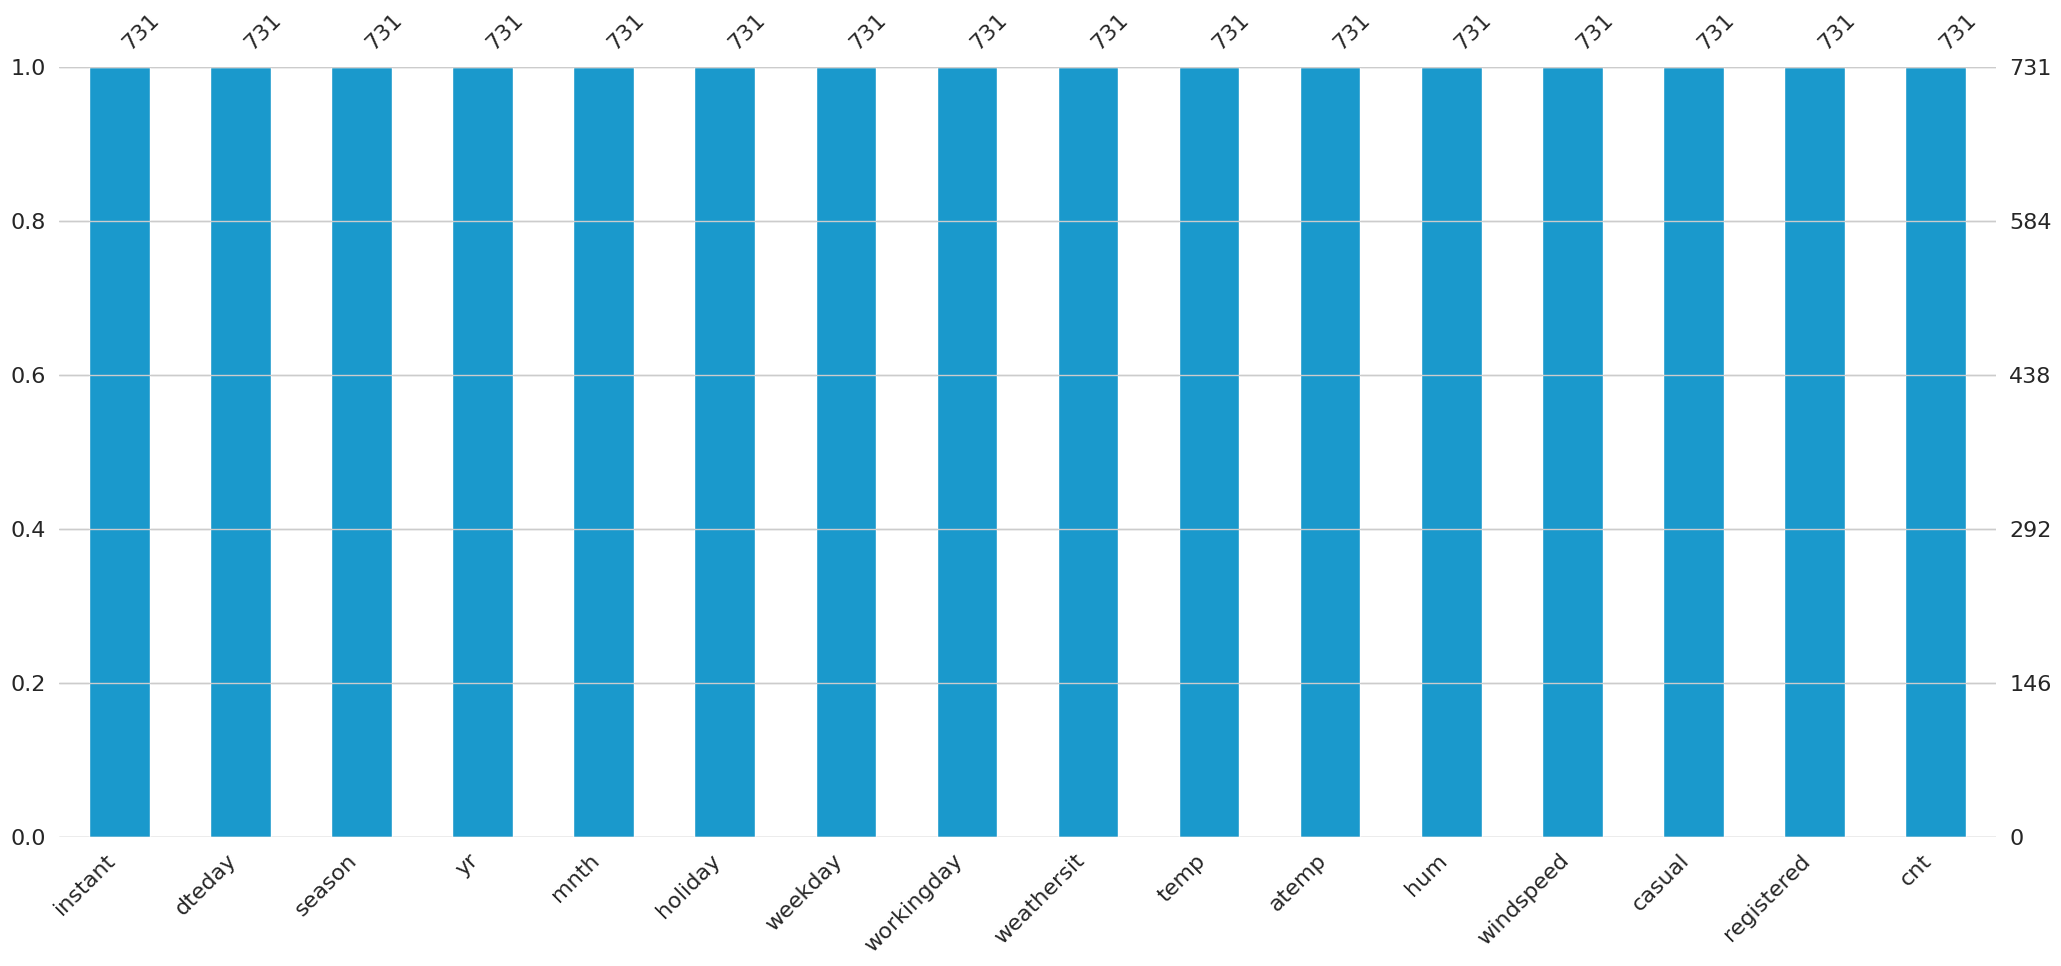

In [ ]:
msno.bar(data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
weather_features = ['temp', 'atemp', 'hum', 'windspeed']
data[weather_features+["cnt"]].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


Text(0.5, 1.0, 'yr_variable')

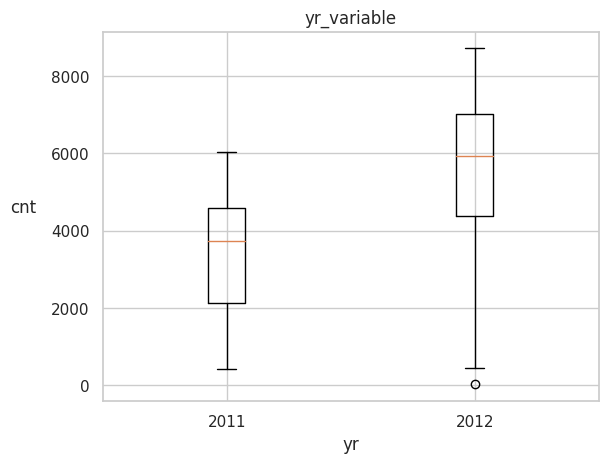

In [ ]:
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)

axes1.boxplot([data[data['yr']==0]['cnt'],
               data[data['yr']==1]['cnt']],
              labels=[2011,2012])
axes1.set_xlabel('yr')
axes1.set_ylabel('cnt',rotation=0,labelpad=20)
axes1.set_title('yr_variable')

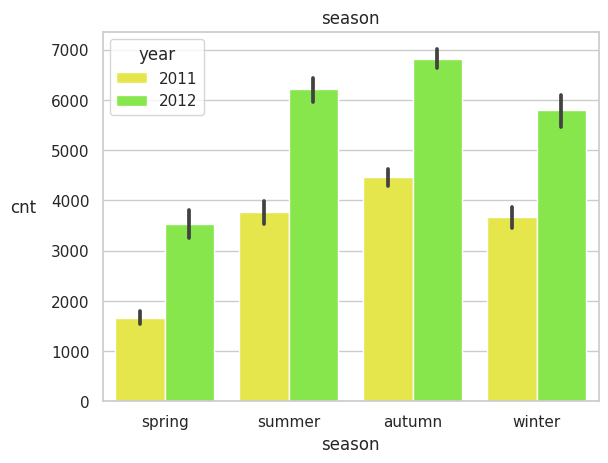

In [ ]:
sns.set_theme(style="whitegrid")
custom_palette = ["#FEFF33", "#80FF33"]
ax=sns.barplot(x="season", y="cnt", data=data, hue='yr', palette=custom_palette)
plt.title("season")
plt.xticks([0,1,2,3],['spring','summer','autumn','winter'])
plt.ylabel("cnt",rotation=0,labelpad=20)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['2011', '2012']
plt.legend(handles=handles, labels=legend_labels, title='year')
plt.show()

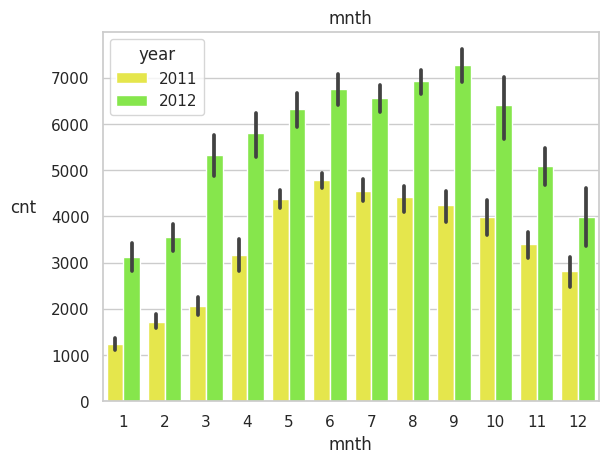

In [ ]:
sns.set_theme(style="whitegrid")
custom_palette = ["#FEFF33", "#80FF33"]
ax=sns.barplot(x="mnth", y="cnt", data=data, hue='yr', palette=custom_palette)
plt.title("mnth")
plt.ylabel("cnt",rotation=0,labelpad=20)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['2011', '2012']
plt.legend(handles=handles, labels=legend_labels, title='year')
plt.show()

In [ ]:
data['day'] = data['dteday'].dt.day_name()
data['month'] = data['dteday'].dt.month_name()
monthly_bike_share  = (data.groupby('day').count())
monthly_bike_share  = (data.groupby('month')['cnt'].sum()/52).round(1)
monthly_bike_share.head()

month
April       5174.9
August      6753.7
December    4058.4
February    2910.6
January     2594.9
Name: cnt, dtype: float64

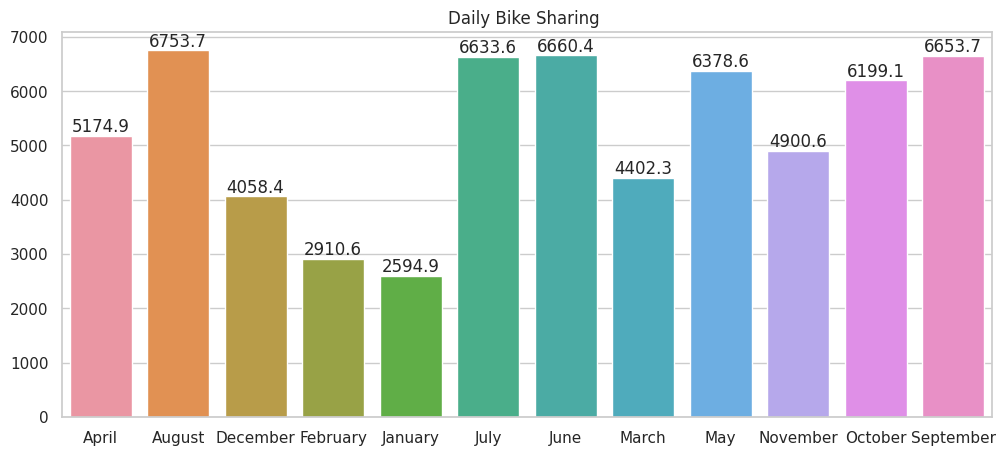

In [ ]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing ")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

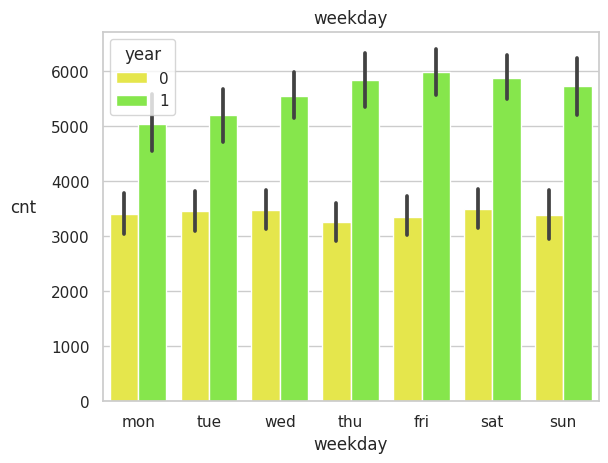

In [ ]:
sns.set_theme(style="whitegrid")
custom_palette = ["#FEFF33", "#80FF33"]
sns.barplot(x="weekday", y="cnt", data=data, hue='yr', palette=custom_palette)
plt.title("weekday")
plt.xticks([0,1,2,3,4,5,6],['mon','tue','wed','thu','fri','sat','sun'])
plt.ylabel("cnt",rotation=0,labelpad=20)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['2011', '2012']
plt.legend(handles=handles, labels=legend_labels, title='year')
plt.show()

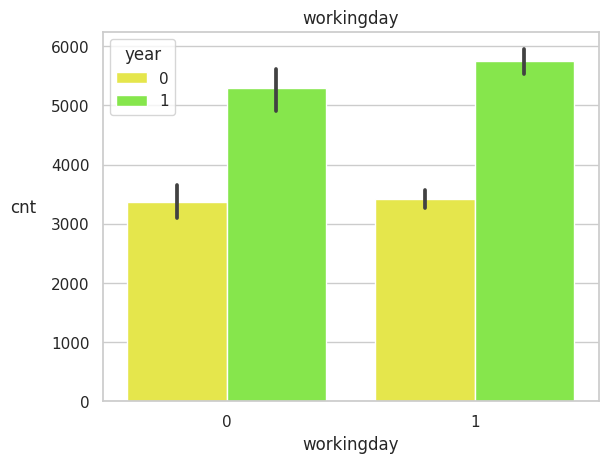

In [ ]:
sns.set_theme(style="whitegrid")
custom_palette = ["#FEFF33", "#80FF33"]
sns.barplot(x="workingday", y="cnt", data=data, hue='yr', palette=custom_palette)
plt.title("workingday")
plt.ylabel("cnt",rotation=0,labelpad=20)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['2011', '2012']
plt.legend(handles=handles, labels=legend_labels, title='year')
plt.show()

Text(0, 0.5, 'cnt')

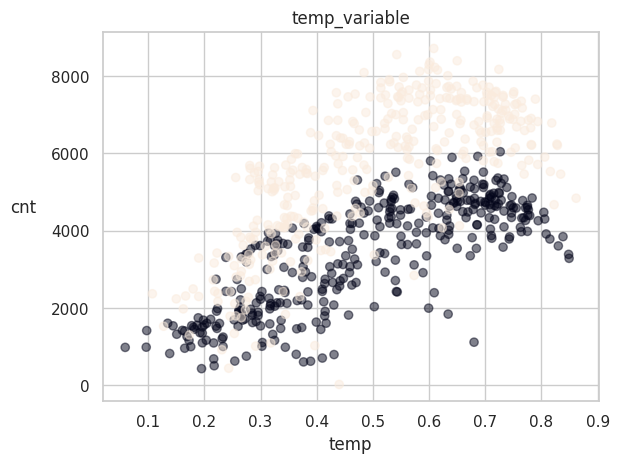

In [ ]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=data['temp'],
    y=data['cnt'],
    c=data['yr'],
    alpha=0.5
)
axes1.set_title('temp_variable')
axes1.set_xlabel('temp')
axes1.set_ylabel('cnt',rotation=0,labelpad=20)

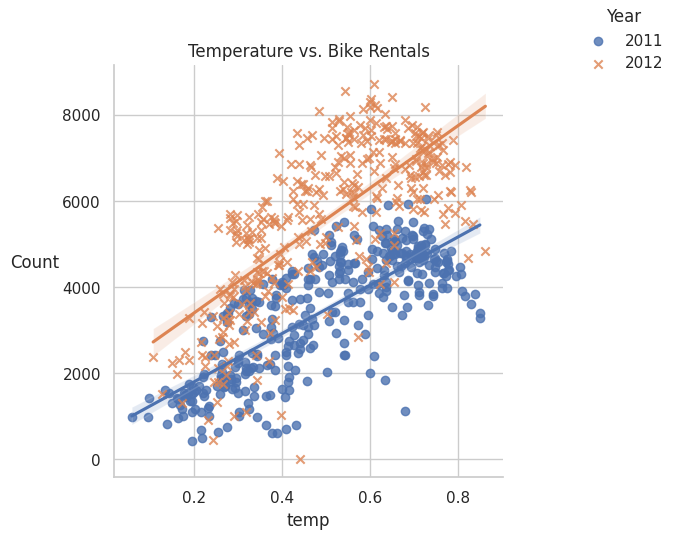

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.lmplot(x="temp", y="cnt", hue="yr", data=data, markers=["o", "x"], legend_out=True)
plt.ylabel("Count", rotation=0, labelpad=20)
plt.title("Temperature vs. Bike Rentals")
new_labels = ["2011", "2012"]
g._legend.set_title("Year")
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.2, 1))
plt.show()

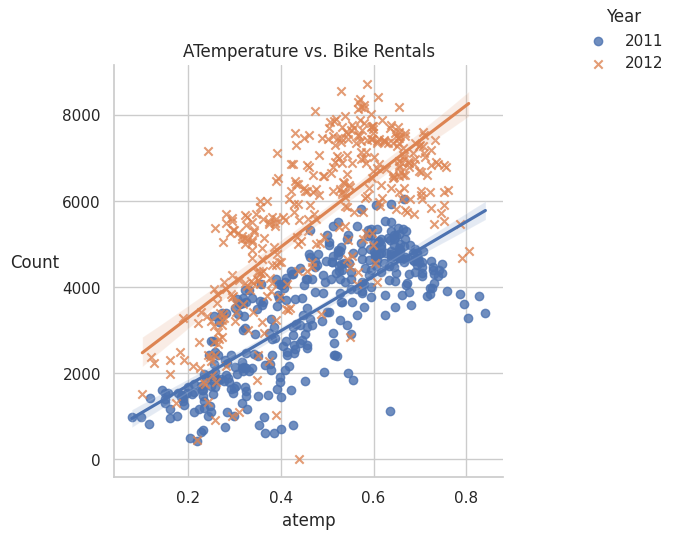

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.lmplot(x="atemp", y="cnt", hue="yr", data=data, markers=["o", "x"], legend_out=True)
plt.ylabel("Count", rotation=0, labelpad=20)
plt.title("ATemperature vs. Bike Rentals")
new_labels = ["2011", "2012"]
g._legend.set_title("Year")
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.2, 1))
plt.show()

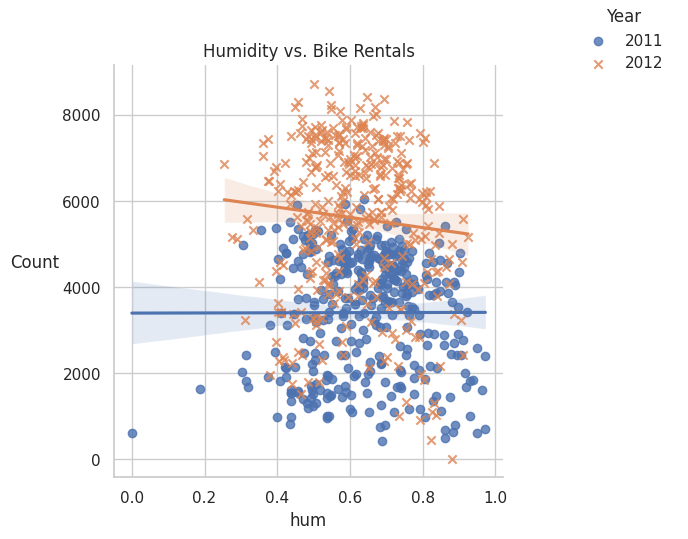

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.lmplot(x="hum", y="cnt", hue="yr", data=data, markers=["o", "x"], legend_out=True)
plt.ylabel("Count", rotation=0, labelpad=20)
plt.title("Humidity vs. Bike Rentals")
new_labels = ["2011", "2012"]
g._legend.set_title("Year")
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.2, 1))
plt.show()

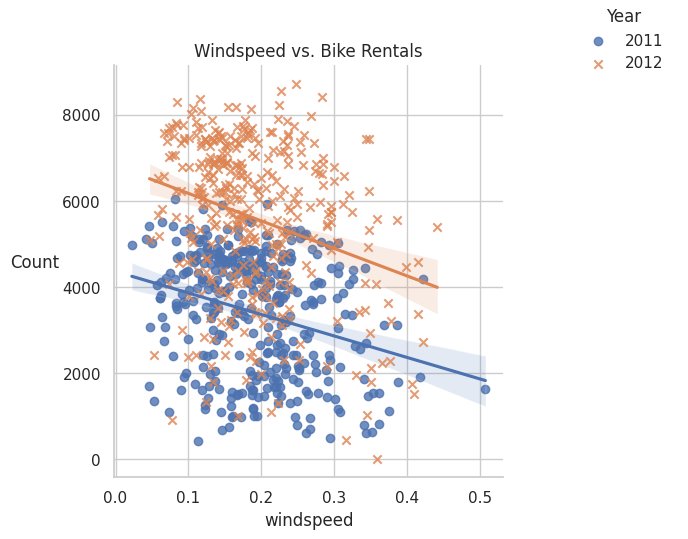

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.lmplot(x="windspeed", y="cnt", hue="yr", data=data, markers=["o", "x"], legend_out=True)
plt.ylabel("Count", rotation=0, labelpad=20)
plt.title("Windspeed vs. Bike Rentals")
new_labels = ["2011", "2012"]
g._legend.set_title("Year")
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.2, 1))
plt.show()

Text(0, 0.5, 'cnt')

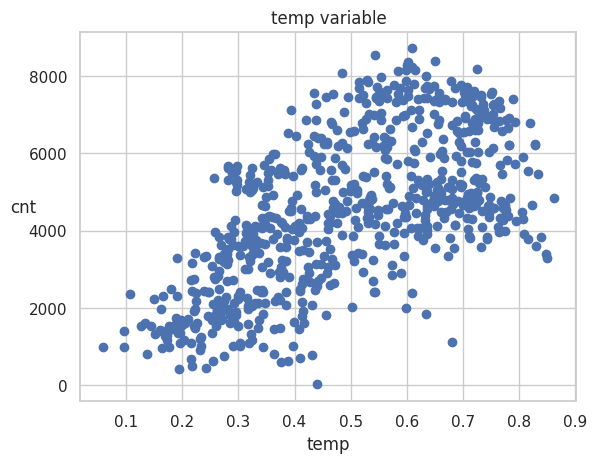

In [ ]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(data['temp'],data['cnt'])
axes1.set_title('temp variable')
axes1.set_xlabel('temp')
axes1.set_ylabel('cnt',rotation=0)

Text(0, 0.5, 'cnt')

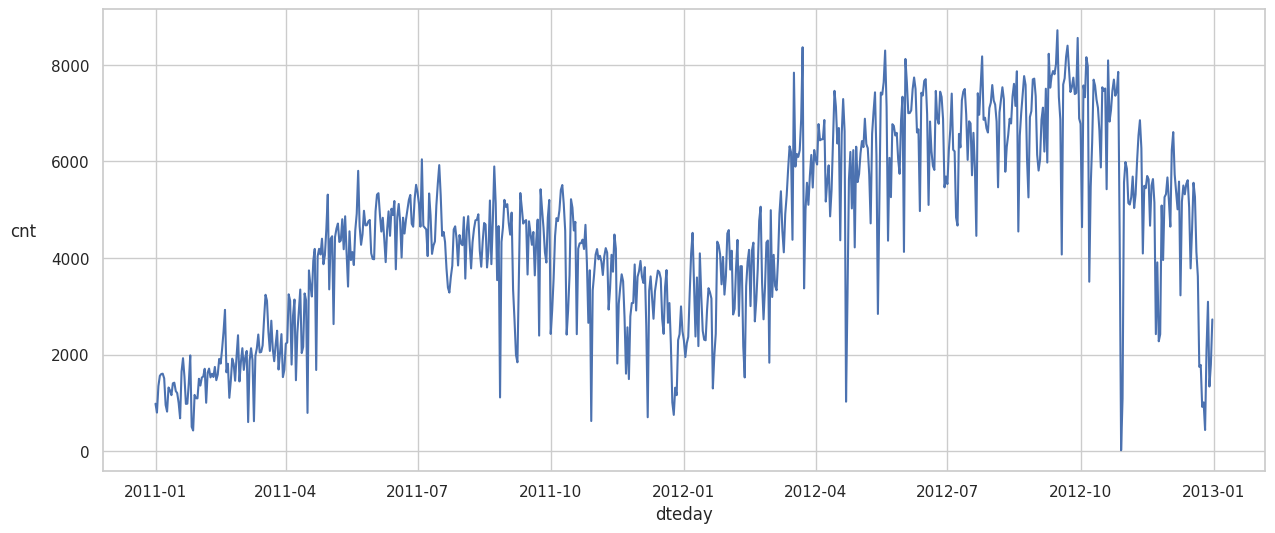

In [ ]:
plt.figure(figsize=[15,6])
ax = sns.lineplot(x=data['dteday'], y=data['cnt'], data=data)
plt.ylabel("cnt",rotation=0,labelpad=20)

#WDC 모델링 제작

#변수 전환

In [ ]:
#dteday 전환
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 가능한 모든 변수 변환 상태를 시도하여 MAE, MSE, R-squared를 출력
for transform_type in ['log', 'sqrt', 'none']:
    # X_train, X_test를 복제하여 변환을 실험적으로 진행
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()

    # 변수 변환 적용
    if transform_type == 'log':
        X_train_transformed[:, 0] = np.log1p(X_train_transformed[:, 0])
        X_test_transformed[:, 0] = np.log1p(X_test_transformed[:, 0])
    elif transform_type == 'sqrt':
        X_train_transformed[:, 0] = np.sqrt(X_train_transformed[:, 0])
        X_test_transformed[:, 0] = np.sqrt(X_test_transformed[:, 0])

    # Ridge 회귀 모델 생성 및 학습
    alpha = 1.0  # 정규화 파라미터 (람다)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train_transformed, y_train)

    # 테스트 데이터로 예측
    y_pred = ridge_regressor.predict(X_test_transformed)

    # 모델 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # 결과 출력
    print(f"Transformation Type: {transform_type}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r_squared}")
    print()


Transformation Type: log
Mean Absolute Error (MAE): 0.0009979974711313844
Mean Squared Error (MSE): 1.7642832972342148e-06
R-squared (R^2): 0.99999999999956

Transformation Type: sqrt
Mean Absolute Error (MAE): 0.001981839071959257
Mean Squared Error (MSE): 6.371313247655053e-06
R-squared (R^2): 0.999999999998411

Transformation Type: none
Mean Absolute Error (MAE): 0.0017296797595918179
Mean Squared Error (MSE): 4.615173111233162e-06
R-squared (R^2): 0.999999999998849



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52398e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.27173e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
#모든 값 전환해보기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 가능한 모든 변수 변환 상태를 시도하여 MAE, MSE, R-squared를 출력
for column in X.columns:
    for transform_type in ['log', 'sqrt', 'none']:
        # X_train, X_test를 복제하여 변환을 실험적으로 진행
        X_train_transformed = X_train.copy()
        X_test_transformed = X_test.copy()

        # 변수 변환 적용
        if transform_type == 'log':
            X_train_transformed[column] = np.log1p(X_train_transformed[column])
            X_test_transformed[column] = np.log1p(X_test_transformed[column])
        elif transform_type == 'sqrt':
            X_train_transformed[column] = np.sqrt(X_train_transformed[column])
            X_test_transformed[column] = np.sqrt(X_test_transformed[column])

        # Ridge 회귀 모델 생성 및 학습
        alpha = 1.0  # 정규화 파라미터 (람다)
        ridge_regressor = Ridge(alpha=alpha)
        ridge_regressor.fit(X_train_transformed, y_train)

        # 테스트 데이터로 예측
        y_pred = ridge_regressor.predict(X_test_transformed)

        # 모델 평가
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # 결과 출력
        print(f"Column: {column}, Transformation Type: {transform_type}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R-squared (R^2): {r_squared}")
        print()


Column: dteday, Transformation Type: log
Mean Absolute Error (MAE): 3.6207614345179532e-06
Mean Squared Error (MSE): 2.323871753113706e-11
R-squared (R^2): 1.0

Column: dteday, Transformation Type: sqrt
Mean Absolute Error (MAE): 3.631337806320492e-06
Mean Squared Error (MSE): 2.327356067957998e-11
R-squared (R^2): 1.0

Column: dteday, Transformation Type: none
Mean Absolute Error (MAE): 3.645826123212888e-06
Mean Squared Error (MSE): 2.3400845421554176e-11
R-squared (R^2): 1.0

Column: temp, Transformation Type: log
Mean Absolute Error (MAE): 3.6193957650236066e-06
Mean Squared Error (MSE): 2.303655854930554e-11
R-squared (R^2): 1.0

Column: temp, Transformation Type: sqrt
Mean Absolute Error (MAE): 3.65703719328367e-06
Mean Squared Error (MSE): 2.347488742687181e-11
R-squared (R^2): 1.0

Column: temp, Transformation Type: none
Mean Absolute Error (MAE): 3.645826123212888e-06
Mean Squared Error (MSE): 2.3400845421554176e-11
R-squared (R^2): 1.0

Column: atemp, Transformation Type: log

In [ ]:
#최적의 현태 찾기(MAE기준)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 변수 변환 형태를 저장할 딕셔너리
best_transformations = {}

# 가능한 모든 변수 변환 상태를 시도하여 MAE를 비교
for column in X.columns:
    best_mae = float('inf')
    best_transform = None

    for transform_type in ['log', 'sqrt', 'none']:
        # X_train, X_test를 복제하여 변환을 실험적으로 진행
        X_train_transformed = X_train.copy()
        X_test_transformed = X_test.copy()

        # 변수 변환 적용
        if transform_type == 'log':
            X_train_transformed[column] = np.log1p(X_train_transformed[column])
            X_test_transformed[column] = np.log1p(X_test_transformed[column])
        elif transform_type == 'sqrt':
            X_train_transformed[column] = np.sqrt(X_train_transformed[column])
            X_test_transformed[column] = np.sqrt(X_test_transformed[column])

        # Ridge 회귀 모델 생성 및 학습
        alpha = 1.0  # 정규화 파라미터 (람다)
        ridge_regressor = Ridge(alpha=alpha)
        ridge_regressor.fit(X_train_transformed, y_train)

        # 테스트 데이터로 예측
        y_pred = ridge_regressor.predict(X_test_transformed)

        # 모델 평가
        mae = mean_absolute_error(y_test, y_pred)

        # 현재 형태가 이전까지 최적이면 갱신
        if mae < best_mae:
            best_mae = mae
            best_transform = transform_type

    # 최적의 형태를 딕셔너리에 저장
    best_transformations[column] = best_transform

# 각 변수당 최적의 형태 출력
for column, transform in best_transformations.items():
    print(f"Column: {column}, Best Transformation: {transform}")


Column: dteday, Best Transformation: log
Column: temp, Best Transformation: log
Column: atemp, Best Transformation: log
Column: hum, Best Transformation: sqrt
Column: windspeed, Best Transformation: log
Column: casual, Best Transformation: none
Column: registered, Best Transformation: none
Column: season_1, Best Transformation: log
Column: season_2, Best Transformation: log
Column: season_3, Best Transformation: log
Column: season_4, Best Transformation: log
Column: yr_0, Best Transformation: log
Column: yr_1, Best Transformation: log
Column: mnth_1, Best Transformation: log
Column: mnth_2, Best Transformation: log
Column: mnth_3, Best Transformation: log
Column: mnth_4, Best Transformation: log
Column: mnth_5, Best Transformation: log
Column: mnth_6, Best Transformation: log
Column: mnth_7, Best Transformation: log
Column: mnth_8, Best Transformation: sqrt
Column: mnth_9, Best Transformation: log
Column: mnth_10, Best Transformation: sqrt
Column: mnth_11, Best Transformation: log
Colu

In [ ]:
#최적의 현태 찾기(MSE기준)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 변수 변환 형태를 저장할 딕셔너리
best_transformations = {}

# 가능한 모든 변수 변환 상태를 시도하여 MAE를 비교
for column in X.columns:
    best_mse = float('inf')
    best_transform = None

    for transform_type in ['log', 'sqrt', 'none']:
        # X_train, X_test를 복제하여 변환을 실험적으로 진행
        X_train_transformed = X_train.copy()
        X_test_transformed = X_test.copy()

        # 변수 변환 적용
        if transform_type == 'log':
            X_train_transformed[column] = np.log1p(X_train_transformed[column])
            X_test_transformed[column] = np.log1p(X_test_transformed[column])
        elif transform_type == 'sqrt':
            X_train_transformed[column] = np.sqrt(X_train_transformed[column])
            X_test_transformed[column] = np.sqrt(X_test_transformed[column])

        # Ridge 회귀 모델 생성 및 학습
        alpha = 1.0  # 정규화 파라미터 (람다)
        ridge_regressor = Ridge(alpha=alpha)
        ridge_regressor.fit(X_train_transformed, y_train)

        # 테스트 데이터로 예측
        y_pred = ridge_regressor.predict(X_test_transformed)

        # 모델 평가
        mse = mean_absolute_error(y_test, y_pred)

        # 현재 형태가 이전까지 최적이면 갱신
        if mse < best_mse:
            best_mse = mse
            best_transform = transform_type

    # 최적의 형태를 딕셔너리에 저장
    best_transformations[column] = best_transform

# 각 변수당 최적의 형태 출력
for column, transform in best_transformations.items():
    print(f"Column: {column}, Best Transformation: {transform}")


Column: dteday, Best Transformation: log
Column: temp, Best Transformation: log
Column: atemp, Best Transformation: log
Column: hum, Best Transformation: sqrt
Column: windspeed, Best Transformation: log
Column: casual, Best Transformation: none
Column: registered, Best Transformation: none
Column: season_1, Best Transformation: log
Column: season_2, Best Transformation: log
Column: season_3, Best Transformation: log
Column: season_4, Best Transformation: log
Column: yr_0, Best Transformation: log
Column: yr_1, Best Transformation: log
Column: mnth_1, Best Transformation: log
Column: mnth_2, Best Transformation: log
Column: mnth_3, Best Transformation: log
Column: mnth_4, Best Transformation: log
Column: mnth_5, Best Transformation: log
Column: mnth_6, Best Transformation: log
Column: mnth_7, Best Transformation: log
Column: mnth_8, Best Transformation: sqrt
Column: mnth_9, Best Transformation: log
Column: mnth_10, Best Transformation: sqrt
Column: mnth_11, Best Transformation: log
Colu

# wdc_day릿지, 라쏘회귀, 랜덤포레스트

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# '날짜' 열을 날짜 데이터로 변환 후 숫자로 변환
data['dteday'] = pd.to_datetime(data['dteday']).astype(int)

# 독립 변수 (X)와 종속 변수 (y) 분리
X = data.drop(columns=['cnt'])  # 종속 변수 'cnt'를 제외한 나머지 열을 독립 변수로 사용
y = data['cnt']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 선형 회귀 모델 생성 및 학습
ridge_model = Ridge(alpha=1.0)  # alpha는 규제 강도 조절
ridge_model.fit(X_train, y_train)

# 라쏘 선형 회귀 모델 생성 및 학습
lasso_model = Lasso(alpha=1.0)  # alpha는 규제 강도 조절
lasso_model.fit(X_train, y_train)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 트리 개수는 100으로 설정
rf_model.fit(X_train, y_train)

# 예측
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# MAE, MSE, R-squared 계산 및 출력
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r_squared = r2_score(y_test, ridge_predictions)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r_squared = r2_score(y_test, lasso_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r_squared = r2_score(y_test, rf_predictions)

print("Ridge 선형 회귀 모델:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"R-squared: {ridge_r_squared}")
print()

print("Lasso 선형 회귀 모델:")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"R-squared: {lasso_r_squared}")
print()

print("랜덤 포레스트 모델:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r_squared}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.18663e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge 선형 회귀 모델:
MAE: 2.972212025607756e-06
MSE: 1.4094899203247402e-11
R-squared: 1.0

Lasso 선형 회귀 모델:
MAE: 0.00889681503935459
MSE: 0.00013360203366201024
R-squared: 0.9999999999666818

랜덤 포레스트 모델:
MAE: 66.77190476190476
MSE: 10912.635890476195
R-squared: 0.9972785645300498


# wdc_day 릿지모델

day 데이터

릿지모델

alpha = 8.98989898989899

로그 변환등 유의미한 차이는 없는듯

z-score이상치 제거, 임계값은 0.5

Mean Absolute Error (MAE): 8.016557694645599e-05

Mean Squared Error (MSE): 1.8682053237739638e-08

R-squared (R^2): 0.9999999999999952

Shapiro-Wilk Test p-value: 0.0

데이터는 정규 분포를 따르지 않습니다.

In [51]:
#릿지 모델 제작
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 및 학습
alpha = 1.0  # 정규화 파라미터 (람다)
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha (Regularization Strength): {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Alpha (Regularization Strength): 1.0
Mean Absolute Error (MAE): 0.0017296797595918179
Mean Squared Error (MSE): 4.615173111233162e-06
R-squared (R^2): 0.999999999998849


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MAE를 계산하는 함수 정의
def calculate_mae(X_train, X_test, y_train, y_test):
    # 릿지 회귀 모델 생성 및 학습
    alpha = 1.0  # 정규화 파라미터 (람다)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)

    # 테스트 데이터로 예측
    y_pred = ridge_regressor.predict(X_test)

    # 모델 평가 및 MAE 반환
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# 각 변수에 대한 MAE 계산
mae_results = []

for i in range(X.shape[1]):  # 각 변수에 대해 반복
    X_train_log = X_train.copy()
    X_test_log = X_test.copy()
    X_train_sqrt = X_train.copy()
    X_test_sqrt = X_test.copy()

    # 로그 변환
    X_train_log[:, i] = np.log1p(X_train_log[:, i])
    X_test_log[:, i] = np.log1p(X_test_log[:, i])

    # 제곱근 변환
    X_train_sqrt[:, i] = np.sqrt(X_train_sqrt[:, i])
    X_test_sqrt[:, i] = np.sqrt(X_test_sqrt[:, i])

    # MAE 계산
    mae_log = calculate_mae(X_train_log, X_test_log, y_train, y_test)
    mae_sqrt = calculate_mae(X_train_sqrt, X_test_sqrt, y_train, y_test)
    mae_no_transform = calculate_mae(X_train, X_test, y_train, y_test)

    mae_results.append((mae_log, mae_sqrt, mae_no_transform))

# 각 변수에 대한 MAE 결과 출력
for i, (mae_log, mae_sqrt, mae_no_transform) in enumerate(mae_results):
    print(f"Variable {i + 1}:")
    print(f"MAE with Log Transform: {mae_log} (log)")
    print(f"MAE with Square Root Transform: {mae_sqrt} (sqrt)")
    print(f"MAE with No Transformation: {mae_no_transform} (none)")
    print()

# 가장 낮은 MAE를 가진 변환 형태 찾기
transformations = ['log', 'sqrt', 'none']
best_transformations = [transformations[np.argmin(mae)] for mae in mae_results]
print(f"Best Transformation for Each Variable: {best_transformations}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52398e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.27173e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.20972e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Variable 1:
MAE with Log Transform: 0.0009979974711313844 (log)
MAE with Square Root Transform: 0.001981839071959257 (sqrt)
MAE with No Transformation: 0.0017296797595918179 (none)

Variable 2:
MAE with Log Transform: 0.002194436965510249 (log)
MAE with Square Root Transform: 0.0026313106063753366 (sqrt)
MAE with No Transformation: 0.0017296797595918179 (none)

Variable 3:
MAE with Log Transform: 0.0021957086864858866 (log)
MAE with Square Root Transform: 0.0026555482763797045 (sqrt)
MAE with No Transformation: 0.0017296797595918179 (none)

Variable 4:
MAE with Log Transform: 0.002102936152368784 (log)
MAE with Square Root Transform: 0.002106841653585434 (sqrt)
MAE with No Transformation: 0.0017296797595918179 (none)

Variable 5:
MAE with Log Transform: 0.00207960675470531 (log)
MAE with Square Root Transform: 0.0016749894712120295 (sqrt)
MAE with No Transformation: 0.0017296797595918179 (none)

Variable 6:
MAE with Log Transform: 209.27845764160156 (log)
MAE with Square Root Transform

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.19155e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22531e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [38]:
# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 및 학습
alpha = 8.98989898989899  # 정규화 파라미터 (람다)
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 각 변수에 대해 최적 변환 형태를 리스트로 저장
best_transformations = ['log', 'none', 'none', 'none', 'sqrt', 'none', 'none', 'sqrt', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'sqrt', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'log', 'sqrt', 'log']

# 각 변수에 최적 변환 적용하여 MAE 계산
mae_results = []

for i in range(X_test.shape[1]):
    X_test_transformed = X_test.copy()

    if best_transformations[i] == 'log':
        X_test_transformed[:, i] = np.log1p(X_test[:, i])
    elif best_transformations[i] == 'sqrt':
        X_test_transformed[:, i] = np.sqrt(X_test[:, i])

    mae = mean_absolute_error(y_test, ridge_regressor.predict(X_test_transformed))
    mae_results.append(mae)

# 결과 출력
for i, mae in enumerate(mae_results):
    transform = best_transformations[i]
    print(f"Variable {i + 1}: Transformation: {transform}, MAE: {mae}")

Variable 1: Transformation: log, MAE: 0.0075982543639838696
Variable 2: Transformation: none, MAE: 0.0004430628032423556
Variable 3: Transformation: none, MAE: 0.0004430628032423556
Variable 4: Transformation: none, MAE: 0.0004430628032423556
Variable 5: Transformation: sqrt, MAE: 0.00043897563591599464
Variable 6: Transformation: none, MAE: 0.0004430628032423556
Variable 7: Transformation: none, MAE: 0.0004430628032423556
Variable 8: Transformation: sqrt, MAE: 0.0004430628032423556
Variable 9: Transformation: log, MAE: 0.0005385599797591567
Variable 10: Transformation: log, MAE: 0.0006921858876012266
Variable 11: Transformation: log, MAE: 0.0006704265833832324
Variable 12: Transformation: log, MAE: 0.0008856714703142643
Variable 13: Transformation: log, MAE: 0.0007964283577166498
Variable 14: Transformation: log, MAE: 0.0004646534798666835
Variable 15: Transformation: log, MAE: 0.000461331830592826
Variable 16: Transformation: log, MAE: 0.0004787704674527049
Variable 17: Transformatio

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.32769e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [21]:
#하이퍼파라미터 튜닝
best_alpha = None
best_mae = float('inf')
best_mse = float('inf')
best_r_squared = -float('inf')

# alpha 값을 0부터 10까지 변화시키면서 최적의 alpha 찾기
for alpha in np.linspace(0, 10, 100):
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    y_pred = ridge_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    if mae < best_mae:
        best_alpha = alpha
        best_mae = mae
        best_mse = mse
        best_r_squared = r_squared

# 최적의 alpha 값과 평가 지표 출력
print(f"Best Alpha: {best_alpha}")
print(f"Mean Absolute Error (MAE): {best_mae}")
print(f"Mean Squared Error (MSE): {best_mse}")
print(f"R-squared (R^2): {best_r_squared}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.19969e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.87175e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.43522e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.86813e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Best Alpha: 8.98989898989899
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.90888e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.94537e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98187e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.01837e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [26]:
#릿지 모델 제작, 최적의 알파값 대입
# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 및 학습
alpha = 8.98989898989899  # 정규화 파라미터 (람다)
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha (Regularization Strength): {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Alpha (Regularization Strength): 8.98989898989899
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.32769e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [28]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (Min-Max 스케일링)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Alpha 값을 설정
alpha = 8.98989898989899

# 릿지 회귀 모델 생성 및 학습
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Alpha: 8.98989898989899
Mean Absolute Error (MAE): 313.9775085449219
Mean Squared Error (MSE): 186032.515625
R-squared (R^2): 0.9536064888784542


In [30]:
# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Alpha 값을 설정
alpha = 8.98989898989899

# 릿지 회귀 모델 생성 및 학습
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Z 점수 기반 이상치 제거
z_scores = np.abs((y_test - y_pred) / np.std(y_test - y_pred))
threshold = 3  # 임계값 설정
outliers = np.where(z_scores > threshold)
X_test_cleaned = np.delete(X_test, outliers, axis=0)
y_test_cleaned = np.delete(y_test, outliers)

# 모델 재평가 (이상치 제거 후)
y_pred_cleaned = ridge_regressor.predict(X_test_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r_squared_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

# 이상치 제거 후 결과 출력
print("\nAfter Outlier Removal:")
print(f"Mean Absolute Error (MAE): {mae_cleaned}")
print(f"Mean Squared Error (MSE): {mse_cleaned}")
print(f"R-squared (R^2): {r_squared_cleaned}")


Alpha: 8.98989898989899
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969

After Outlier Removal:
Mean Absolute Error (MAE): 0.0003982624039053917
Mean Squared Error (MSE): 3.0793259497841063e-07
R-squared (R^2): 0.999999999999923


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.32769e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# 다양한 임계값을 시도할 범위 설정
thresholds = [0.5, 1, 1.5, 2, 2.5, 3]  # 원하는 범위로 수정

best_threshold = None
best_mae = float('inf')  # 무한대로 초기화

for threshold in thresholds:
    # Z 점수 계산
    z_scores = np.abs((y_test - y_pred) / np.std(y_test - y_pred))

    # 이상치 제거
    outliers = np.where(z_scores > threshold)
    X_test_cleaned = np.delete(X_test, outliers, axis=0)
    y_test_cleaned = np.delete(y_test, outliers)

    # 모델 재평가 (이상치 제거 후)
    y_pred_cleaned = ridge_regressor.predict(X_test_cleaned)
    mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

    # 현재 임계값의 MAE를 비교하여 최적의 임계값 갱신
    if mae_cleaned < best_mae:
        best_mae = mae_cleaned
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best MAE: {best_mae}")

Best Threshold: 0.5
Best MAE: 8.016557694645599e-05


In [41]:
# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Alpha 값을 설정
alpha = 8.98989898989899

# 릿지 회귀 모델 생성 및 학습
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Z 점수 기반 이상치 제거
z_scores = np.abs((y_test - y_pred) / np.std(y_test - y_pred))
threshold = 0.5  # 임계값 설정
outliers = np.where(z_scores > threshold)
X_test_cleaned = np.delete(X_test, outliers, axis=0)
y_test_cleaned = np.delete(y_test, outliers)

# 모델 재평가 (이상치 제거 후)
y_pred_cleaned = ridge_regressor.predict(X_test_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r_squared_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

# 이상치 제거 후 결과 출력
print("\nAfter Outlier Removal:")
print(f"Mean Absolute Error (MAE): {mae_cleaned}")
print(f"Mean Squared Error (MSE): {mse_cleaned}")
print(f"R-squared (R^2): {r_squared_cleaned}")

Alpha: 8.98989898989899
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969

After Outlier Removal:
Mean Absolute Error (MAE): 8.016557694645599e-05
Mean Squared Error (MSE): 1.8682053237739638e-08
R-squared (R^2): 0.9999999999999952


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.32769e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


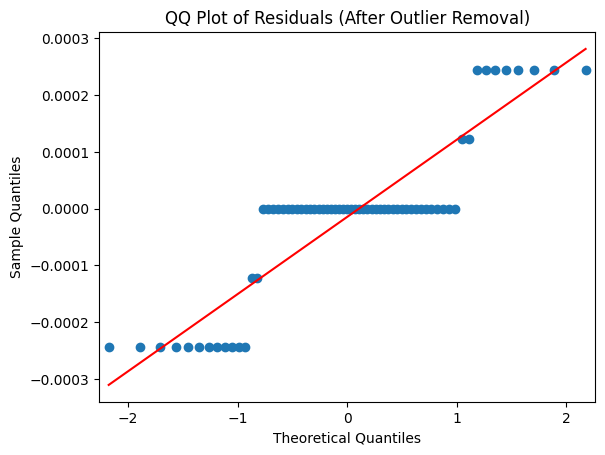

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ridge 모델 학습 후 예측한 결과
residuals_cleaned = y_test_cleaned - y_pred_cleaned

# QQ 플롯 생성
sm.qqplot(residuals_cleaned, line='s')  # 's'는 기준선을 의미합니다.

# QQ 플롯에 제목 추가
plt.title('QQ Plot of Residuals (After Outlier Removal)')

# 그래프 표시
plt.show()

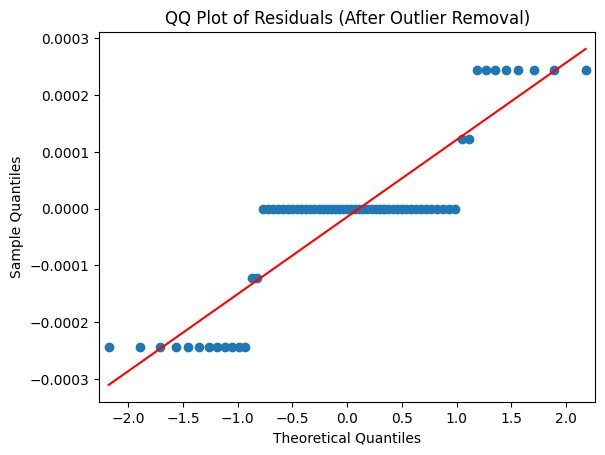

In [64]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Ridge 모델 학습 후 예측한 결과
residuals_cleaned = y_test_cleaned - y_pred_cleaned

# QQ 플롯 생성
sm.qqplot(residuals_cleaned, line='s')  # 's'는 기준선을 의미합니다.

# 가로축 간격을 0.5로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))

# QQ 플롯에 제목 추가
plt.title('QQ Plot of Residuals (After Outlier Removal)')

# 그래프 표시
plt.show()

In [31]:
# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Alpha 값을 설정
alpha = 8.98989898989899

# 릿지 회귀 모델 생성 및 학습
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# IQR 기반 이상치 제거
Q1 = np.percentile(y_test, 25)
Q3 = np.percentile(y_test, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = np.where((y_test < lower_bound) | (y_test > upper_bound))
X_test_cleaned = np.delete(X_test, outliers, axis=0)
y_test_cleaned = np.delete(y_test, outliers)

# 모델 재평가 (이상치 제거 후)
y_pred_cleaned = ridge_regressor.predict(X_test_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r_squared_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

# 이상치 제거 후 결과 출력
print("\nAfter Outlier Removal:")
print(f"Mean Absolute Error (MAE): {mae_cleaned}")
print(f"Mean Squared Error (MSE): {mse_cleaned}")
print(f"R-squared (R^2): {r_squared_cleaned}")

Alpha: 8.98989898989899
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969

After Outlier Removal:
Mean Absolute Error (MAE): 0.0004430628032423556
Mean Squared Error (MSE): 4.13592971426624e-07
R-squared (R^2): 0.9999999999998969


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.32769e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [43]:
from scipy.stats import shapiro

# X_train_no_outliers는 이상치가 제거된 훈련 데이터입니다.
# 이 데이터의 정규성을 검정합니다.
_, p_value = shapiro(X_train_no_outliers)

# p-value를 출력하여 정규성 확인
print(f"Shapiro-Wilk Test p-value: {p_value}")

# p-value를 기준으로 정규성을 평가할 수 있습니다.
alpha = 0.05  # 유의수준 (일반적으로 0.05를 사용)
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk Test p-value: 0.0
데이터는 정규 분포를 따르지 않습니다.


# wdc_day 라쏘모델

alpha=0.1

->단순히 1.0와 0.1을 비교하면 1.0이 더 좋아보이지만 이상치를 제거할 경우 0.1이 더 좋음

scaler= X

이상치제거 X

Mean Absolute Error (MAE): 0.0009100647876039147

Mean Squared Error (MSE): 1.4887546058162116e-06

R-squared (R^2): 0.9999999999996287

In [9]:
#라쏘모델 돌려보기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Alpha 값을 설정
alpha = 1.0  # 라쏘 규제 하이퍼파라미터

# 라쏘 회귀 모델 생성 및 학습
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Alpha: 1.0
Mean Absolute Error (MAE): 0.0030563510954380035
Mean Squared Error (MSE): 1.6432102711405605e-05
R-squared (R^2): 0.9999999999959021


In [17]:
#로그,제곱근 변환, 의미 없음


# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 각 열에 대한 데이터 변환 적용
data['temp'] = np.log(data['temp'])
data['atemp'] = np.log(data['atemp'])
data['hum'] = np.sqrt(data['hum'])
data['windspeed'] = np.log(data['windspeed'])
data['season_1'] = np.log(data['season_1'])
data['season_2'] = np.log(data['season_2'])
data['season_3'] = np.log(data['season_3'])
data['season_4'] = np.log(data['season_4'])
data['yr_0'] = np.log(data['yr_0'])
data['yr_1'] = np.log(data['yr_1'])
data['mnth_1'] = np.log(data['mnth_1'])
data['mnth_2'] = np.log(data['mnth_2'])
data['mnth_3'] = np.log(data['mnth_3'])
data['mnth_4'] = np.log(data['mnth_4'])
data['mnth_5'] = np.log(data['mnth_5'])
data['mnth_6'] = np.log(data['mnth_6'])
data['mnth_7'] = np.log(data['mnth_7'])
data['mnth_8'] = np.sqrt(data['mnth_8'])
data['mnth_9'] = np.log(data['mnth_9'])
data['mnth_10'] = np.sqrt(data['mnth_10'])
data['mnth_11'] = np.log(data['mnth_11'])
data['mnth_12'] = np.log(data['mnth_12'])
data['holiday_0'] = np.sqrt(data['holiday_0'])
data['holiday_1'] = np.sqrt(data['holiday_1'])
data['weekday_0'] = np.sqrt(data['weekday_0'])
data['weekday_1'] = np.sqrt(data['weekday_1'])
data['weekday_2'] = np.sqrt(data['weekday_2'])
data['weekday_3'] = np.sqrt(data['weekday_3'])
data['weekday_4'] = np.log(data['weekday_4'])
data['weekday_5'] = np.sqrt(data['weekday_5'])
data['weekday_6'] = np.log(data['weekday_6'])
data['workingday_0'] = np.log(data['workingday_0'])
data['workingday_1'] = np.log(data['workingday_1'])
data['weathersit_1'] = np.log(data['weathersit_1'])
data['weathersit_2'] = np.log(data['weathersit_2'])
data['weathersit_3'] = np.log(data['weathersit_3'])
# Alpha 값을 설정
alpha = 1.0  # 라쏘 규제 하이퍼파라미터

# 라쏘 회귀 모델 생성 및 학습
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Alpha: 1.0
Mean Absolute Error (MAE): 0.0030563510954380035
Mean Squared Error (MSE): 1.6432102711405605e-05
R-squared (R^2): 0.9999999999959021


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
#하이퍼파라미터 튜닝을 통한 최적의 alpha값 찾기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 교차 검증을 사용하여 최적의 alpha 값을 찾기
alphas = np.logspace(-6, 6, 13)  # 다양한 alpha 값 범위 설정
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 교차 검증을 통해 최적 alpha 찾기
lasso_cv.fit(X_train, y_train)

# 최적의 alpha 값 출력
optimal_alpha = lasso_cv.alpha_
print(f"Optimal Alpha: {optimal_alpha}")

# 최적 alpha로 라쏘 회귀 모델 생성 및 학습
lasso_regressor = Lasso(alpha=optimal_alpha)
lasso_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Optimal Alpha: 0.1
Mean Absolute Error (MAE): 0.005499729420989752
Mean Squared Error (MSE): 4.934333264827728e-05
R-squared (R^2): 0.9999999999876946


In [19]:
#alpha가 0.1일 때와 1일 때 비교하기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (이전 코드와 동일한 부분)
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])
data = data.fillna(data.mean())
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 첫 번째 모델: alpha = 0.1
lasso_regressor_1 = Lasso(alpha=0.1)
lasso_regressor_1.fit(X_train, y_train)
y_pred_1 = lasso_regressor_1.predict(X_test)

# 두 번째 모델: alpha = 1
lasso_regressor_2 = Lasso(alpha=1.0)
lasso_regressor_2.fit(X_train, y_train)
y_pred_2 = lasso_regressor_2.predict(X_test)

# 모델 평가
mae_1 = mean_absolute_error(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
r_squared_1 = r2_score(y_test, y_pred_1)

mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
r_squared_2 = r2_score(y_test, y_pred_2)

# 결과 출력
print("Model 1 (alpha = 0.1) Performance:")
print(f"Mean Absolute Error (MAE): {mae_1}")
print(f"Mean Squared Error (MSE): {mse_1}")
print(f"R-squared (R^2): {r_squared_1}")
print()

print("Model 2 (alpha = 1) Performance:")
print(f"Mean Absolute Error (MAE): {mae_2}")
print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R^2): {r_squared_2}")

Model 1 (alpha = 0.1) Performance:
Mean Absolute Error (MAE): 0.005499729420989752
Mean Squared Error (MSE): 4.934333264827728e-05
R-squared (R^2): 0.9999999999876946

Model 2 (alpha = 1) Performance:
Mean Absolute Error (MAE): 0.0030563510954380035
Mean Squared Error (MSE): 1.6432102711405605e-05
R-squared (R^2): 0.9999999999959021


In [20]:
#Standardscaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alpha 값을 설정
alpha = 1.0  # 라쏘 규제 하이퍼파라미터

# 라쏘 회귀 모델 생성 및 학습
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test_scaled)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Alpha: 1.0
Mean Absolute Error (MAE): 1.0174236297607422
Mean Squared Error (MSE): 1.4841428995132446
R-squared (R^2): 0.9999996298786561


In [22]:
#Min-Max scaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alpha 값을 0.1로 설정
alpha = 0.1

# 라쏘 회귀 모델 생성 및 학습
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test_scaled)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Alpha: 0.1
Mean Absolute Error (MAE): 0.42593634128570557
Mean Squared Error (MSE): 0.268890380859375
R-squared (R^2): 0.9999999329430762


In [23]:
#최적의 임계값 찾기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 임계값에 대한 교차 검증을 수행하여 최적의 임계값 찾기
thresholds = np.arange(3.5, 10, 0.1)  # 다양한 임계값 범위 설정
best_threshold = None
best_score = float('-inf')

for threshold in thresholds:
    # Z-score를 사용하여 이상치 제거
    z_scores = np.abs(stats.zscore(X_train))
    X_train_no_outliers = X_train[(z_scores < threshold).all(axis=1)]
    y_train_no_outliers = y_train[(z_scores < threshold).all(axis=1)]

    # 라쏘 회귀 모델 생성 및 교차 검증 수행
    alpha = 0.1
    lasso_regressor = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_regressor, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='r2')

    # 교차 검증 점수의 평균을 계산
    mean_score = np.mean(scores)

    # 최적의 임계값 업데이트
    if mean_score > best_score:
        best_score = mean_score
        best_threshold = threshold

# 최적의 임계값 출력
print(f"Best Threshold: {best_threshold}")

# 최적 임계값으로 이상치 제거
z_scores = np.abs(stats.zscore(X_train))
X_train_no_outliers = X_train[(z_scores < best_threshold).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < best_threshold).all(axis=1)]

# 최적 alpha로 라쏘 회귀 모델 생성 및 학습
alpha = 0.1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Best Threshold: {best_threshold}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Best Threshold: 3.7
Best Threshold: 3.7
Mean Absolute Error (MAE): 0.0009100647876039147
Mean Squared Error (MSE): 1.4887546058162116e-06
R-squared (R^2): 0.9999999999996287


In [25]:
#z-score 이상치 제거
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score를 사용하여 이상치 제거
z_scores = np.abs(stats.zscore(X_train))
threshold = 3.7
X_train_no_outliers = X_train[(z_scores < threshold).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < threshold).all(axis=1)]

# 라쏘 회귀 모델 생성 및 학습
alpha = 0.1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

from scipy.stats import shapiro

# X_train_no_outliers는 이상치가 제거된 훈련 데이터입니다.
# 이 데이터의 정규성을 검정합니다.
_, p_value = shapiro(X_train_no_outliers)

# p-value를 출력하여 정규성 확인
print(f"Shapiro-Wilk Test p-value: {p_value}")

# p-value를 기준으로 정규성을 평가할 수 있습니다.
alpha = 0.05  # 유의수준 (일반적으로 0.05를 사용)
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Alpha: 0.1
Mean Absolute Error (MAE): 0.0009100647876039147
Mean Squared Error (MSE): 1.4887546058162116e-06
R-squared (R^2): 0.9999999999996287
Shapiro-Wilk Test p-value: 0.0
데이터는 정규 분포를 따르지 않습니다.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


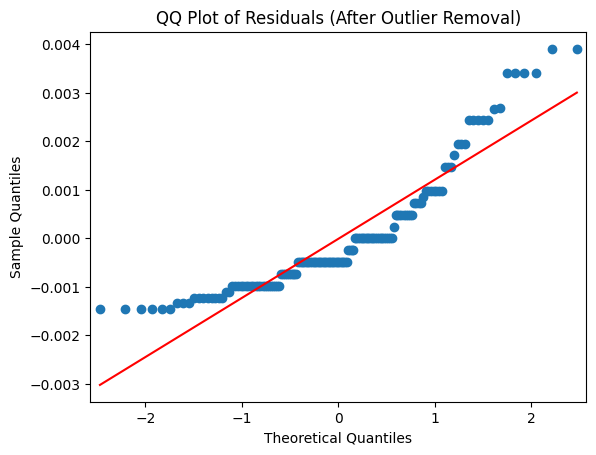

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ridge 모델 학습 후 예측한 결과
residuals_cleaned = y_test - y_pred

# QQ 플롯 생성
sm.qqplot(residuals_cleaned, line='s')  # 's'는 기준선을 의미합니다.

# QQ 플롯에 제목 추가
plt.title('QQ Plot of Residuals (After Outlier Removal)')

# 그래프 표시
plt.show()

In [ ]:
#IQR 데이터 부족으로 에러
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IQR을 사용하여 이상치 제거
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거하고 새로운 데이터 생성
mask = np.all((X_train >= lower_bound) & (X_train <= upper_bound), axis=1)
X_train_no_outliers = X_train[mask]
y_train_no_outliers = y_train[mask]

# 라쏘 회귀 모델 생성 및 학습
alpha = 0.1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = lasso_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Alpha: {alpha}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


ValueError: ignored

# wdc_day 랜덤포레스트

Number of Estimators: 74

scaler=MIN-MAX 스케일러

이상치제거 X

Mean Absolute Error (MAE): 63.263007905865045

Mean Squared Error (MSE): 10007.503412541058

R-squared (R^2): 0.9975042899817276

In [ ]:
#랜덤포레스트 모델 제작
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
n_estimators = 100  # 결정 트리의 개수
random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Estimators: {n_estimators}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Estimators: 100
Mean Absolute Error (MAE): 65.04272108843537
Mean Squared Error (MSE): 10295.797236734694
R-squared (R^2): 0.9974323941496118


In [ ]:
#최적의 추정치값 찾기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 n_estimators 값에 대한 모델 훈련 및 평가
best_n_estimators = None
best_mae = float('inf')  # 초기값으로 무한대 설정

for n_estimators in range(1, 101):  # n_estimators 값을 1부터 100까지 시도
    random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    random_forest_regressor.fit(X_train, y_train)
    y_pred = random_forest_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    # 현재의 n_estimators 값으로 얻은 MAE가 더 작으면 최적의 값을 업데이트
    if mae < best_mae:
        best_mae = mae
        best_n_estimators = n_estimators

# 최적의 n_estimators 값으로 모델 다시 훈련
random_forest_regressor = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Mean Absolute Error (MAE): {best_mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Best Number of Estimators: 74
Mean Absolute Error (MAE): 63.263007905865045
Mean Squared Error (MSE): 10007.503412541058
R-squared (R^2): 0.9975042899817276


In [ ]:
#MIn-Max 스케일링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성 및 학습 (n_estimators=74)
n_estimators = 74
random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test_scaled)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Estimators: {n_estimators}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Estimators: 74
Mean Absolute Error (MAE): 63.28736900165472
Mean Squared Error (MSE): 10000.388401087244
R-squared (R^2): 0.9975060643508817


In [ ]:
#standard스케일링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준 스케일링 (Z-score normalization) 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성 및 학습 (n_estimators=74)
n_estimators = 74
random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test_scaled)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Estimators: {n_estimators}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Estimators: 74
Mean Absolute Error (MAE): 63.44622173193602
Mean Squared Error (MSE): 10040.358725520893
R-squared (R^2): 0.9974960963963371


In [ ]:
#z-score 데이터수 부족
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이상치 제거 (Z-score 방법 사용)
z_scores = np.abs(stats.zscore(X_train))
threshold = 3  # 임계값 설정
X_train_no_outliers = X_train[(z_scores < threshold).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < threshold).all(axis=1)]

# 랜덤 포레스트 모델 생성 및 학습 (n_estimators=74)
n_estimators = 74
random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Estimators: {n_estimators}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


ValueError: ignored

In [ ]:
#IQR 방식 이상치 제거, 데이터 수 부족
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IQR 기반 이상치 제거
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = np.logical_or(X_train < lower_bound, X_train > upper_bound).any(axis=1)

X_train_no_outliers = X_train[~outliers_mask]
y_train_no_outliers = y_train[~outliers_mask]

# 랜덤 포레스트 모델 생성 및 학습 (n_estimators=74)
n_estimators = 74
random_forest_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = random_forest_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Estimators: {n_estimators}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


ValueError: ignored

# wdc_day KNN

Best K: 4

scaler=?

이상치제거 X
Mean Absolute Error (MAE): 58.48979568481445

Mean Squared Error (MSE): 8854.7578125

R-squared (R^2): 0.9977917661905141



In [ ]:
#KNN 모델 제작
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 (K=5, 예시에서는 5로 설정)
k_neighbors = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Neighbors (K): {k_neighbors}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Neighbors (K): 5
Mean Absolute Error (MAE): 57.367347717285156
Mean Squared Error (MSE): 10044.1591796875
R-squared (R^2): 0.997495148460996


In [ ]:
#하이퍼파라미터 튜닝
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K 값 범위 설정
k_values = list(range(1, 101))

# 초기값 설정
best_mae = float('inf')
best_mse = float('inf')
best_r_squared = -float('inf')
best_k = None

# 각 K 값에 대한 성능 지표 계산
for k in k_values:
    # KNN 모델 생성 및 학습
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # 테스트 데이터로 예측
    y_pred = knn_regressor.predict(X_test)

    # 모델 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # 가장 좋은 성능을 가진 K 값을 업데이트
    if mae < best_mae and mse < best_mse:
        best_mae = mae
        best_mse = mse
        best_r_squared = r_squared
        best_k = k

# 최적의 K 값과 성능 지표 출력
print(f"Best K: {best_k}")
print(f"Mean Absolute Error (MAE): {best_mae}")
print(f"Mean Squared Error (MSE): {best_mse}")
print(f"R-squared (R^2): {best_r_squared}")


Best K: 4
Mean Absolute Error (MAE): 58.48979568481445
Mean Squared Error (MSE): 8854.7578125
R-squared (R^2): 0.9977917661905141


In [ ]:
#Min-Max 스케일링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터 스케일링 (Min-Max 스케일링)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습 (K=4)
k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"K = {k}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


K = 4
Mean Absolute Error (MAE): 493.498291015625
Mean Squared Error (MSE): 662591.0
R-squared (R^2): 0.8347604705536336


In [ ]:
#standard 스케일링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습 (K=4)
k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"K = {k}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


K = 4
Mean Absolute Error (MAE): 678.3180541992188
Mean Squared Error (MSE): 751600.9375
R-squared (R^2): 0.8125628400225443


In [ ]:
#z-score 이상치 제거
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이상치 제거 (Z-score 방법 사용)
z_scores = np.abs(stats.zscore(X_train))
threshold = 3  # 임계값 설정
outliers_mask = (z_scores < threshold).all(axis=1)

X_train_no_outliers = X_train[~outliers_mask]
y_train_no_outliers = y_train[~outliers_mask]

# KNN 모델 생성 (K=4)
k_neighbors = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# 테스트 데이터로 예측
y_pred = knn_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Neighbors (K): {k_neighbors}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Neighbors (K): 4
Mean Absolute Error (MAE): 58.48979568481445
Mean Squared Error (MSE): 8854.7578125
R-squared (R^2): 0.9977917661905141


<ipython-input-45-e61907989d50>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dteday'] = pd.to_datetime(data['dteday'])
<ipython-input-45-e61907989d50>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)


In [ ]:
#최적의 임계값 찾기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_mae = float('inf')
best_threshold = None

# 다양한 임계값을 시도하여 가장 낮은 MAE를 찾음
for threshold in np.arange(0.1, 5.0, 0.1):
    z_scores = np.abs(stats.zscore(X_train))
    outliers_mask = (z_scores < threshold).all(axis=1)

    X_train_no_outliers = X_train[~outliers_mask]
    y_train_no_outliers = y_train[~outliers_mask]

    k_neighbors = 4
    knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
    knn_regressor.fit(X_train_no_outliers, y_train_no_outliers)

    y_pred = knn_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    if mse < best_mse:
        best_mae = mae
        best_threshold = threshold
        best_mse = mse
        best_r_squared = r_squared

# 최적의 임계값과 MAE, MSE, R-squared 출력
print(f"Best Threshold: {best_threshold}")
print(f"Best MAE: {best_mae}")
print(f"Best MSE: {best_mse}")
print(f"Best R-squared: {best_r_squared}")


Best Threshold: 0.1
Best MAE: 58.48979568481445
Best MSE: 8854.7578125
Best R-squared: 0.9977917661905141


In [ ]:
#Min-Max 스케일링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 모델 생성 (K=4)
k_neighbors = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = knn_regressor.predict(X_test_scaled)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Number of Neighbors (K): {k_neighbors}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Number of Neighbors (K): 4
Mean Absolute Error (MAE): 493.5544128417969
Mean Squared Error (MSE): 660874.75
R-squared (R^2): 0.8351884652446546


# wdc_day RNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1)))  # 입력 형태를 수정함
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 데이터를 모델에 맞게 변환 (시퀀스 길이 추가)
X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)  # 입력 형태를 수정함
X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)  # 입력 형태를 수정함

# 모델 학습
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# 모델 평가
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss (MSE): {loss}")

# 모델 예측
predictions = model.predict(X_test_reshaped)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Epoch 1/10
19/19 [==============================] - 2s 29ms/step - loss: 20872670.0000 - val_loss: 10578489.0000
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 2558750.2500 - val_loss: 1254880.7500
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 493884.7812 - val_loss: 188951.0625
Epoch 4/10
19/19 [==============================] - 0s 17ms/step - loss: 133676.4219 - val_loss: 90927.7656
Epoch 5/10
19/19 [==============================] - 0s 14ms/step - loss: 95204.6875 - val_loss: 78600.3828
Epoch 6/10
19/19 [==============================] - 0s 11ms/step - loss: 79208.9141 - val_loss: 73444.3047
Epoch 7/10
19/19 [==============================] - 0s 13ms/step - loss: 69118.7656 - val_loss: 82147.9844
Epoch 8/10
19/19 [==============================] - 0s 11ms/step - loss: 75786.0078 - val_loss: 55283.2773
Epoch 9/10
19/19 [==============================] - 0s 13ms/step - loss: 50602.6836 - val_loss: 44455.9883
Epoch 10/10
5/5 [=======

In [ ]:
#Min-Max 스케일링
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 데이터를 모델에 맞게 변환 (시퀀스 길이 추가)
X_train_reshaped = X_train_scaled.reshape(-1, X.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X.shape[1], 1)

# 모델 학습
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# 모델 평가
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss (MSE): {loss}")

# 모델 예측
predictions = model.predict(X_test_reshaped)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Epoch 1/10
19/19 [==============================] - 1s 19ms/step - loss: 24458494.0000 - val_loss: 22272746.0000
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 18180794.0000 - val_loss: 2302479.0000
Epoch 3/10
19/19 [==============================] - 0s 8ms/step - loss: 3888691.7500 - val_loss: 3040296.2500
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 2135152.0000 - val_loss: 2111460.2500
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 1793620.0000 - val_loss: 1981369.6250
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 1757431.6250 - val_loss: 1999941.6250
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 1777375.6250 - val_loss: 1841748.5000
Epoch 8/10
19/19 [==============================] - 0s 8ms/step - loss: 1694577.7500 - val_loss: 2149603.0000
Epoch 9/10
19/19 [==============================] - 0s 8ms/step - loss: 1835617.0000 - val_loss: 1737570.3750
Epoch 

In [ ]:
#standard 스케일링
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (Standardization) 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))  # return_sequences=True로 설정
model.add(SimpleRNN(32, activation='relu'))  # 추가적인 RNN 레이어
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 데이터를 모델에 맞게 변환 (시퀀스 길이 추가)
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)

# 모델 학습
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# 모델 평가
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss (MSE): {loss}")

# 모델 예측
predictions = model.predict(X_test_reshaped)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Epoch 1/10
19/19 [==============================] - 3s 43ms/step - loss: 24469442.0000 - val_loss: 22320680.0000
Epoch 2/10
19/19 [==============================] - 0s 19ms/step - loss: 24462560.0000 - val_loss: 22308010.0000
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 20070044.0000 - val_loss: 3795699.2500
Epoch 4/10
19/19 [==============================] - 0s 23ms/step - loss: 6178231.0000 - val_loss: 3093681.7500
Epoch 5/10
19/19 [==============================] - 0s 23ms/step - loss: 2972694.7500 - val_loss: 2775152.7500
Epoch 6/10
19/19 [==============================] - 0s 23ms/step - loss: 2424839.5000 - val_loss: 2363133.5000
Epoch 7/10
19/19 [==============================] - 0s 23ms/step - loss: 2237056.7500 - val_loss: 2265240.7500
Epoch 8/10
19/19 [==============================] - 1s 26ms/step - loss: 2139077.0000 - val_loss: 2126017.5000
Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: 1963613.6250 - val_loss: 2076933.5

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-점수를 사용하여 이상치 제거
threshold = 5
z_scores = np.abs(stats.zscore(X_train))
outliers_mask = (z_scores < threshold).all(axis=1)

X_train_no_outliers = X_train[outliers_mask]
y_train_no_outliers = y_train[outliers_mask]

# 표준화 (Standardization) 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test)

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))  # return_sequences=True로 설정
model.add(SimpleRNN(32, activation='relu'))  # 추가적인 RNN 레이어
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 데이터를 모델에 맞게 변환 (시퀀스 길이 추가)
X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# 모델 학습
model.fit(X_train_reshaped, y_train_no_outliers, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# 모델 평가
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss (MSE): {loss}")

# 모델 예측
predictions = model.predict(X_test_reshaped)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Epoch 1/10
18/18 [==============================] - 5s 63ms/step - loss: 25286942.0000 - val_loss: 22315162.0000
Epoch 2/10
18/18 [==============================] - 1s 31ms/step - loss: 25037812.0000 - val_loss: 18254776.0000
Epoch 3/10
18/18 [==============================] - 1s 36ms/step - loss: 9537910.0000 - val_loss: 5061135.0000
Epoch 4/10
18/18 [==============================] - 1s 28ms/step - loss: 4333827.0000 - val_loss: 3640775.0000
Epoch 5/10
18/18 [==============================] - 0s 25ms/step - loss: 2394515.5000 - val_loss: 2229851.0000
Epoch 6/10
18/18 [==============================] - 1s 31ms/step - loss: 1851502.7500 - val_loss: 2040698.3750
Epoch 7/10
18/18 [==============================] - 0s 25ms/step - loss: 1686079.6250 - val_loss: 2258036.2500
Epoch 8/10
18/18 [==============================] - 1s 32ms/step - loss: 1684799.0000 - val_loss: 2019426.6250
Epoch 9/10
18/18 [==============================] - 0s 28ms/step - loss: 1524342.8750 - val_loss: 1747295.12

In [ ]:
#IQR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IQR을 사용하여 이상치 제거
threshold = 2  # 샘플이 남아있도록 threshold 값을 수정
z_scores = np.abs(stats.zscore(X_train))
outliers_mask = (z_scores < threshold).all(axis=1)

if outliers_mask.any():
    X_train_no_outliers = X_train[~outliers_mask]
    y_train_no_outliers = y_train[~outliers_mask]

    # 표준화 (Standardization) 스케일링 적용
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_no_outliers)
    X_test_scaled = scaler.transform(X_test)

    # RNN 모델 생성
    model = Sequential()
    model.add(SimpleRNN(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
    model.add(SimpleRNN(32, activation='relu'))
    model.add(Dense(1))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 데이터를 모델에 맞게 변환 (시퀀스 길이 추가)
    X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

    # 모델 학습
    model.fit(X_train_reshaped, y_train_no_outliers, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

    # 모델 평가
    loss = model.evaluate(X_test_reshaped, y_test)
    print(f"Test Loss (MSE): {loss}")

    # 모델 예측
    predictions = model.predict(X_test_reshaped)

    # MAE, MSE, R-squared 계산
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r_squared}")
else:
    print("No samples left after outlier removal.")


No samples left after outlier removal.


# wdc_day 사이킷런의 LinearRegression

Mean Absolute Error (MAE): 0.0011436047498136759

Mean Squared Error (MSE): 1.952745151356794e-06

R-squared (R^2): 0.9999999999995131

In [28]:
#선형회귀모델
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 0.0011436047498136759
Mean Squared Error (MSE): 1.952745151356794e-06
R-squared (R^2): 0.9999999999995131


In [29]:
#standard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (Standardization) 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = model.predict(X_test_scaled)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Mean Absolute Error (MAE): 0.0010280479909852147
Mean Squared Error (MSE): 1.666902676333848e-06
R-squared (R^2): 0.9999999999995843


In [30]:
#Min-Max
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = model.predict(X_test_scaled)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Mean Absolute Error (MAE): 0.00265897368080914
Mean Squared Error (MSE): 8.396601515414659e-06
R-squared (R^2): 0.999999999997906


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 임계값에 대한 성능을 저장할 리스트
thresholds = np.arange(4, 10, 0.1)  # 임계값 범위 설정
best_threshold = None
best_mae = float('inf')

for threshold in thresholds:
    # Z-score를 사용하여 이상치 제거
    z_scores = np.abs(stats.zscore(X_train))
    outliers_mask = (z_scores < threshold).all(axis=1)

    X_train_no_outliers = X_train[outliers_mask]
    y_train_no_outliers = y_train[outliers_mask]

    # 선형 회귀 모델 생성
    model = LinearRegression()

    # 모델 훈련
    model.fit(X_train_no_outliers, y_train_no_outliers)

    # 모델 예측
    y_pred = model.predict(X_test)

    # MAE 계산
    mae = mean_absolute_error(y_test, y_pred)

    # 최적의 임계값 업데이트
    if mae < best_mae:
        best_mae = mae
        best_threshold = threshold

# 최적의 임계값 출력
print(f"Best Threshold: {best_threshold}")
print(f"Best MAE: {best_mae}")

# 최적 임계값으로 이상치 제거
z_scores = np.abs(stats.zscore(X_train))
outliers_mask = (z_scores < best_threshold).all(axis=1)

X_train_no_outliers = X_train[outliers_mask]
y_train_no_outliers = y_train[outliers_mask]

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train_no_outliers, y_train_no_outliers)

# 모델 예측
y_pred = model.predict(X_test)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Final MAE: {mae}")
print(f"Final MSE: {mse}")
print(f"Final R-squared: {r_squared}")

Best Threshold: 5.699999999999994
Best MAE: 0.00034401044831611216
Final MAE: 0.00034401044831611216
Final MSE: 2.125292581922622e-07
Final R-squared: 0.999999999999947


In [36]:
#z-score, 최적의 임계값으로
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score 기반 이상치 탐지 및 제거
z_scores = np.abs(stats.zscore(X_train))
outliers_mask = (z_scores < 5.699999999999994).all(axis=1)  # 임계값을 3으로 설정 (조정 가능)

X_train_no_outliers = X_train[outliers_mask]
y_train_no_outliers = y_train[outliers_mask]

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train_no_outliers, y_train_no_outliers)

# 모델 예측
y_pred = model.predict(X_test)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 0.00034401044831611216
Mean Squared Error (MSE): 2.125292581922622e-07
R-squared (R^2): 0.999999999999947


In [ ]:
#IQR데이터처리
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IQR 기반 이상치 탐지 및 제거
def remove_outliers_iqr(X, y, iqr_threshold=1.5):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return X[mask], y[mask]

X_train_no_outliers, y_train_no_outliers = remove_outliers_iqr(X_train, y_train)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train_no_outliers, y_train_no_outliers)

# 모델 예측
y_pred = model.predict(X_test)

# MAE, MSE, R-squared 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 0.0011436047498136759
Mean Squared Error (MSE): 1.952745151356794e-06
R-squared (R^2): 0.9999999999995131


# wdc_hour 변수처리 후 다른 도시, 다른 년도 테스트해보기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
data = pd.read_csv(data_wdc)

# 열 이름 선택
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data = data[selected_columns]

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 최적 변환 적용
X_train[:, 0] = np.log1p(X_train[:, 0])  # dteday
X_test[:, 0] = np.log1p(X_test[:, 0])

X_train[:, 8] = np.log1p(X_train[:, 8])  # temp
X_test[:, 8] = np.log1p(X_test[:, 8])

X_train[:, 9] = np.log1p(X_train[:, 9])  # atemp
X_test[:, 9] = np.log1p(X_test[:, 9])

X_train[:, 10] = np.sqrt(X_train[:, 10])  # hum
X_test[:, 10] = np.sqrt(X_test[:, 10])

X_train[:, 11] = np.log1p(X_train[:, 11])  # windspeed
X_test[:, 11] = np.log1p(X_test[:, 11])

# 나머지 변수들은 변환을 적용하지 않음 (none)

# Ridge 회귀 모델 생성 및 학습
alpha = 1.0  # 정규화 파라미터 (람다)
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 0.00084596750093624
Mean Squared Error (MSE): 1.2781285931851016e-06
R-squared (R^2): 0.9999999999996813


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.61667e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt', 'instant'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 생성 및 학습
alpha = 1.0  # 정규화 파라미터 (람다)
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Mean Absolute Error (MAE): 0.0008033555350266397
Mean Squared Error (MSE): 9.211489668814465e-07
R-squared (R^2): 0.9999999999709099


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22075e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt', 'instant'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 가능한 모든 변수 변환 상태를 시도하여 MAE, MSE, R-squared를 출력
for transform_type in ['log', 'sqrt', 'none']:
    # X_train, X_test를 복제하여 변환을 실험적으로 진행
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()

    # 변수 변환 적용
    if transform_type == 'log':
        X_train_transformed[:, -4] = np.log1p(X_train_transformed[:, -4])  # 'hr' 변수는 마지막 열로 가정
        X_test_transformed[:, -4] = np.log1p(X_test_transformed[:, -4])
    elif transform_type == 'sqrt':
        X_train_transformed[:, -4] = np.sqrt(X_train_transformed[:, -4])
        X_test_transformed[:, -4] = np.sqrt(X_test_transformed[:, -4])

    # Ridge 회귀 모델 생성 및 학습
    alpha = 1.0  # 정규화 파라미터 (람다)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train_transformed, y_train)

    # 테스트 데이터로 예측
    y_pred = ridge_regressor.predict(X_test_transformed)

    # 모델 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # 결과 출력
    print(f"Transformation Type: {transform_type}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r_squared}")
    print()


Transformation Type: log
Mean Absolute Error (MAE): 0.0008042973349802196
Mean Squared Error (MSE): 9.27111955206783e-07
R-squared (R^2): 0.9999999999707216

Transformation Type: sqrt
Mean Absolute Error (MAE): 0.0008033555350266397
Mean Squared Error (MSE): 9.211489668814465e-07
R-squared (R^2): 0.9999999999709099

Transformation Type: none
Mean Absolute Error (MAE): 0.0008033555350266397
Mean Squared Error (MSE): 9.211489668814465e-07
R-squared (R^2): 0.9999999999709099



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.20623e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22075e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22075e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt', 'instant'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RidgeCV 모델 생성
alphas = [0.01, 0.1, 1.0, 10.0]  # 여러 가지 alpha 값 시도
ridge_cv_regressor = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_regressor.fit(X_train, y_train)

# 최적의 alpha 값
best_alpha = ridge_cv_regressor.alpha_
print(f"Best Alpha: {best_alpha}")

# 테스트 데이터로 예측
y_pred = ridge_cv_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")


Best Alpha: 0.01
Mean Absolute Error (MAE): 0.0018518295720365112
Mean Squared Error (MSE): 4.755849329206433e-06
R-squared (R^2): 0.9999999998498094


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt', 'instant'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 모델 생성
alpha = 0.01  # Ridge 모델의 alpha 값 설정
ridge_regressor = Ridge(alpha=alpha)

# 최적의 변환 적용
X_train[:, 0] = np.log1p(X_train[:, 0])  # dteday
X_test[:, 0] = np.log1p(X_test[:, 0])

X_train[:, 8] = np.log1p(X_train[:, 8])  # temp
X_test[:, 8] = np.log1p(X_test[:, 8])

X_train[:, 9] = np.log1p(X_train[:, 9])  # atemp
X_test[:, 9] = np.log1p(X_test[:, 9])

X_train[:, 10] = np.sqrt(X_train[:, 10])  # hum
X_test[:, 10] = np.sqrt(X_test[:, 10])

X_train[:, 11] = np.log1p(X_train[:, 11])  # windspeed
X_test[:, 11] = np.log1p(X_test[:, 11])

# 모델 학습
ridge_regressor.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = ridge_regressor.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

Mean Absolute Error (MAE): 0.0003000524011440575
Mean Squared Error (MSE): 2.552509101860778e-07
R-squared (R^2): 0.9999999999919391


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.95089e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data_UCI_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_UCI_hour_data.csv'
data = pd.read_csv(data_UCI_hour)

# 'datetime' 변수를 문자열로 변환
data['datetime'] = data['datetime'].astype(str)

# 'datetime' 변수를 ':'를 기준으로 분할
data[['dteday', 'hour']] = data['datetime'].str.split(' ', expand=True)

# 'hour' 변수에서 ':' 제거
data['hour'] = data['hour'].str.replace(':', '').str[:-2]

# 결과 확인
print(data[['datetime', 'dteday', 'hour']].head())


# 결과 확인
print(data[['datetime', 'dteday', 'hour']].head())


          datetime      dteday hour
0  2011-01-01 0:00  2011-01-01    0
1  2011-01-01 1:00  2011-01-01    1
2  2011-01-01 2:00  2011-01-01    2
3  2011-01-01 3:00  2011-01-01    3
4  2011-01-01 4:00  2011-01-01    4
          datetime      dteday hour
0  2011-01-01 0:00  2011-01-01    0
1  2011-01-01 1:00  2011-01-01    1
2  2011-01-01 2:00  2011-01-01    2
3  2011-01-01 3:00  2011-01-01    3
4  2011-01-01 4:00  2011-01-01    4


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 날짜 열을 숫자로 변환 (예: 날짜를 일로 표현)
data_wdc['dteday'] = pd.to_datetime(data_wdc['dteday'])
data_wdc['dteday'] = (data_wdc['dteday'] - data_wdc['dteday'].min()).dt.days.astype(float)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# Ridge 모델 생성 (WDC 데이터)
alpha_wdc = 0.01  # Ridge 모델의 alpha 값 설정
ridge_regressor_wdc = Ridge(alpha=alpha_wdc)

# 최적의 변환 적용 (WDC 데이터)
X_train_wdc[:, 0] = np.log1p(X_train_wdc[:, 0])  # dteday
X_test_wdc[:, 0] = np.log1p(X_test_wdc[:, 0])

X_train_wdc[:, 8] = np.log1p(X_train_wdc[:, 8])  # temp
X_test_wdc[:, 8] = np.log1p(X_test_wdc[:, 8])

X_train_wdc[:, 9] = np.log1p(X_train_wdc[:, 9])  # atemp
X_test_wdc[:, 9] = np.log1p(X_test_wdc[:, 9])

X_train_wdc[:, 10] = np.sqrt(X_train_wdc[:, 10])  # hum
X_test_wdc[:, 10] = np.sqrt(X_test_wdc[:, 10])

X_train_wdc[:, 11] = np.log1p(X_train_wdc[:, 11])  # windspeed
X_test_wdc[:, 11] = np.log1p(X_test_wdc[:, 11])

# 모델 학습 (WDC 데이터)
ridge_regressor_wdc.fit(X_train_wdc, y_train_wdc)

# 테스트 데이터로 예측 (WDC 데이터)
y_pred_wdc = ridge_regressor_wdc.predict(X_test_wdc)

# 모델 평가 (WDC 데이터)
mae_wdc = mean_absolute_error(y_test_wdc, y_pred_wdc)
mse_wdc = mean_squared_error(y_test_wdc, y_pred_wdc)
r_squared_wdc = r2_score(y_test_wdc, y_pred_wdc)

print("WDC 데이터 평가 결과:")
print(f"Mean Absolute Error (MAE): {mae_wdc}")
print(f"Mean Squared Error (MSE): {mse_wdc}")
print(f"R-squared (R^2): {r_squared_wdc}")


# 데이터 불러오기 (UCI 데이터)
data_UCI_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_UCI_hour_data.csv'
data_UCI = pd.read_csv(data_UCI_hour)

# 'datetime' 변수를 문자열로 변환
data_UCI['datetime'] = data_UCI['datetime'].astype(str)

# 'datetime' 변수를 ':'를 기준으로 분할
data_UCI[['dteday', 'hour']] = data_UCI['datetime'].str.split(' ', expand=True)

# 'hour' 변수에서 ':' 제거 및 뒤의 '00' 제거
data_UCI['hour'] = data_UCI['hour'].str.replace(':', '').str[:-2]

# 'dteday' 변수를 '-'를 기준으로 분할
date_split = data_UCI['dteday'].str.split('-')

# 분할된 결과에서 첫 번째 숫자를 'yr' 변수로, 두 번째 숫자를 'mnth' 변수로 설정
data_UCI['yr'] = date_split.str[0].astype(int)-2011
data_UCI['mnth'] = date_split.str[1].astype(int)


   instant  dteday  temp   atemp   hum  windspeed  casual  registered  cnt  \
0        1     0.0  0.24  0.2879  0.81        0.0       3          13   16   
1        2     0.0  0.22  0.2727  0.80        0.0       8          32   40   
2        3     0.0  0.22  0.2727  0.80        0.0       5          27   32   
3        4     0.0  0.24  0.2879  0.75        0.0       3          10   13   
4        5     0.0  0.24  0.2879  0.75        0.0       0           1    1   

   season_1  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
0         1  ...          0          0          0          1             1   
1         1  ...          0          0          0          1             1   
2         1  ...          0          0          0          1             1   
3         1  ...          0          0          0          1             1   
4         1  ...          0          0          0          1             1   

   workingday_1  weathersit_1  weathersit_2  weathersit_3  wea

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.95089e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
data_wdc.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0.0,0.24,0.2879,0.81,0.0,3,13,16,1,...,0,0,0,1,1,0,1,0,0,0
1,2,0.0,0.22,0.2727,0.80,0.0,8,32,40,1,...,0,0,0,1,1,0,1,0,0,0
2,3,0.0,0.22,0.2727,0.80,0.0,5,27,32,1,...,0,0,0,1,1,0,1,0,0,0
3,4,0.0,0.24,0.2879,0.75,0.0,3,10,13,1,...,0,0,0,1,1,0,1,0,0,0
4,5,0.0,0.24,0.2879,0.75,0.0,0,1,1,1,...,0,0,0,1,1,0,1,0,0,0


In [ ]:
# 'mnth' 기반으로 'season' 설정
data_wdc['season'] = np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3)))

data_UCI['season'] = np.where(data_UCI['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_UCI['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_UCI['mnth'].isin([9, 10, 11]), 2, 3)))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정
data_wdc['day'] = data_wdc['dteday'].str.split('-').str[-1].astype(int)

# 'mnth' 기반으로 'season' 설정
data_wdc['season'] = np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3)))
# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit','day'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

In [ ]:
#변수들 로그,제곱근 변환 확인하기 'day'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정
data_wdc['day'] = data_wdc['dteday'].str.split('-').str[-1].astype(int)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'day'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant', 'dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# Ridge 모델 생성
alpha_wdc = 0.01  # Ridge 모델의 alpha 값 설정
ridge_regressor = Ridge(alpha=alpha_wdc)

transformations = ["No Transformation", "Log Transformation", "Square Root Transformation"]

for transform in transformations:
    X_train_transformed = X_train_wdc.copy()
    X_test_transformed = X_test_wdc.copy()

    if transform == "Log Transformation":
        X_train_transformed[:, 0] = np.log1p(X_train_transformed[:, 0])  # 'day' 변수에 로그 변환 적용
        X_test_transformed[:, 0] = np.log1p(X_test_transformed[:, 0])
    elif transform == "Square Root Transformation":
        X_train_transformed[:, 0] = np.sqrt(X_train_transformed[:, 0])  # 'day' 변수에 제곱근 변환 적용
        X_test_transformed[:, 0] = np.sqrt(X_test_transformed[:, 0])

    ridge_regressor.fit(X_train_transformed, y_train_wdc)
    y_pred_transformed = ridge_regressor.predict(X_test_transformed)
    mae = mean_absolute_error(y_test_wdc, y_pred_transformed)
    mse = mean_squared_error(y_test_wdc, y_pred_transformed)
    r_squared = r2_score(y_test_wdc, y_pred_transformed)

    print(f"Transformation: {transform}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r_squared}")
    print()

Transformation: No Transformation
Mean Absolute Error (MAE): 0.0003305668942630291
Mean Squared Error (MSE): 2.710510784709186e-07
R-squared (R^2): 0.9999999999914402

Transformation: Log Transformation
Mean Absolute Error (MAE): 0.0002501355193089694
Mean Squared Error (MSE): 1.2682286865128845e-07
R-squared (R^2): 0.9999999999959949

Transformation: Square Root Transformation
Mean Absolute Error (MAE): 0.00024093996034935117
Mean Squared Error (MSE): 1.6755514309352293e-07
R-squared (R^2): 0.9999999999947086



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83325e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.85448e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.86279e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
#변수들 로그,제곱근 변환 확인하기 'season'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정
data_wdc['day'] = data_wdc['dteday'].str.split('-').str[-1].astype(int)

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'day'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant', 'dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# Ridge 모델 생성
alpha_wdc = 0.01  # Ridge 모델의 alpha 값 설정
ridge_regressor = Ridge(alpha=alpha_wdc)

transformations = ["No Transformation", "Log Transformation", "Square Root Transformation"]

for transform in transformations:
    X_train_transformed = X_train_wdc.copy()
    X_test_transformed = X_test_wdc.copy()

    if transform == "Log Transformation":
        X_train_transformed[:, 27] = np.log1p(X_train_transformed[:, 27])  # 'season' 변수에 로그 변환 적용
        X_test_transformed[:, 27] = np.log1p(X_test_transformed[:, 27])
    elif transform == "Square Root Transformation":
        X_train_transformed[:, 27] = np.sqrt(X_train_transformed[:, 27])  # 'season' 변수에 제곱근 변환 적용
        X_test_transformed[:, 27] = np.sqrt(X_test_transformed[:, 27])

    ridge_regressor.fit(X_train_transformed, y_train_wdc)
    y_pred_transformed = ridge_regressor.predict(X_test_transformed)
    mae = mean_absolute_error(y_test_wdc, y_pred_transformed)
    mse = mean_squared_error(y_test_wdc, y_pred_transformed)
    r_squared = r2_score(y_test_wdc, y_pred_transformed)

    print(f"Transformation: {transform}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r_squared}")
    print()


Transformation: No Transformation
Mean Absolute Error (MAE): 0.0003305668942630291
Mean Squared Error (MSE): 2.710510784709186e-07
R-squared (R^2): 0.9999999999914402

Transformation: Log Transformation
Mean Absolute Error (MAE): 0.00032892360468395054
Mean Squared Error (MSE): 2.5924666147147946e-07
R-squared (R^2): 0.999999999991813

Transformation: Square Root Transformation
Mean Absolute Error (MAE): 0.0003305668942630291
Mean Squared Error (MSE): 2.710510784709186e-07
R-squared (R^2): 0.9999999999914402



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83325e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.77345e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83325e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# 'temp' 및 'atemp' 열에 로그 변환 적용
X_train_wdc[:, 8] = np.log1p(X_train_wdc[:, 8])  # temp
X_test_wdc[:, 8] = np.log1p(X_test_wdc[:, 8])

X_train_wdc[:, 9] = np.log1p(X_train_wdc[:, 9])  # atemp
X_test_wdc[:, 9] = np.log1p(X_test_wdc[:, 9])

# 'hum' 및 'windspeed' 열에 제곱근 변환 적용
X_train_wdc[:, 10] = np.sqrt(X_train_wdc[:, 10])  # hum
X_test_wdc[:, 10] = np.sqrt(X_test_wdc[:, 10])

X_train_wdc[:, 11] = np.log1p(X_train_wdc[:, 11])  # windspeed
X_test_wdc[:, 11] = np.log1p(X_test_wdc[:, 11])

# Ridge 모델 생성 (WDC 데이터)
alpha_wdc = 0.01  # Ridge 모델의 alpha 값 설정
ridge_regressor_wdc = Ridge(alpha=alpha_wdc)

# 모델 학습 (WDC 데이터)
ridge_regressor_wdc.fit(X_train_wdc, y_train_wdc)

# 테스트 데이터로 예측 (WDC 데이터)
y_pred_wdc = ridge_regressor_wdc.predict(X_test_wdc)

# 모델 평가 (WDC 데이터)
mae_wdc = mean_absolute_error(y_test_wdc, y_pred_wdc)
mse_wdc = mean_squared_error(y_test_wdc, y_pred_wdc)
r_squared_wdc = r2_score(y_test_wdc, y_pred_wdc)

print("MAE (제곱근 변환):", mae_wdc)
print("MSE (제곱근 변환):", mse_wdc)
print("R-squared (제곱근 변환):", r_squared_wdc)

MAE (제곱근 변환): 0.0002710932
MSE (제곱근 변환): 2.3086022e-07
R-squared (제곱근 변환): 0.9999999999927094


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.14011e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# Ridge 모델 생성 (WDC 데이터) 및 alpha 후보 값 설정
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# 모델 학습 (WDC 데이터)
ridge_cv.fit(X_train_wdc, y_train_wdc)

# 최적의 alpha 값
best_alpha = ridge_cv.alpha_

# 테스트 데이터로 예측 (WDC 데이터)
y_pred_wdc = ridge_cv.predict(X_test_wdc)

# 모델 평가 (WDC 데이터)
mae_wdc = mean_absolute_error(y_test_wdc, y_pred_wdc)
mse_wdc = mean_squared_error(y_test_wdc, y_pred_wdc)
r_squared_wdc = r2_score(y_test_wdc, y_pred_wdc)

print("최적의 alpha 값:", best_alpha)
print("MAE (제곱근 변환):", mae_wdc)
print("MSE (제곱근 변환):", mse_wdc)
print("R-squared (제곱근 변환):", r_squared_wdc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30204e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19266e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.98203e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.55225e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

최적의 alpha 값: 0.001
MAE (제곱근 변환): 8.8748435e-05
MSE (제곱근 변환): 1.36654625e-08
R-squared (제곱근 변환): 0.9999999999995685


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# 'temp' 및 'atemp' 열에 로그 변환 적용
X_train_wdc[:, 8] = np.log1p(X_train_wdc[:, 8])  # temp
X_test_wdc[:, 8] = np.log1p(X_test_wdc[:, 8])

X_train_wdc[:, 9] = np.log1p(X_train_wdc[:, 9])  # atemp
X_test_wdc[:, 9] = np.log1p(X_test_wdc[:, 9])

# 'hum' 및 'windspeed' 열에 제곱근 변환 적용
X_train_wdc[:, 10] = np.sqrt(X_train_wdc[:, 10])  # hum
X_test_wdc[:, 10] = np.sqrt(X_test_wdc[:, 10])

X_train_wdc[:, 11] = np.log1p(X_train_wdc[:, 11])  # windspeed
X_test_wdc[:, 11] = np.log1p(X_test_wdc[:, 11])

# Ridge 모델 생성 (WDC 데이터)
alpha_wdc = 0.001  # Ridge 모델의 alpha 값 설정
ridge_regressor_wdc = Ridge(alpha=alpha_wdc)

# 모델 학습 (WDC 데이터)
ridge_regressor_wdc.fit(X_train_wdc, y_train_wdc)

# 테스트 데이터로 예측 (WDC 데이터)
y_pred_wdc = ridge_regressor_wdc.predict(X_test_wdc)

# 모델 평가 (WDC 데이터)
mae_wdc = mean_absolute_error(y_test_wdc, y_pred_wdc)
mse_wdc = mean_squared_error(y_test_wdc, y_pred_wdc)
r_squared_wdc = r2_score(y_test_wdc, y_pred_wdc)

print("MAE (제곱근 변환):", mae_wdc)
print("MSE (제곱근 변환):", mse_wdc)
print("R-squared (제곱근 변환):", r_squared_wdc)

MAE (제곱근 변환): 3.5952267e-05
MSE (제곱근 변환): 2.3025506e-09
R-squared (제곱근 변환): 0.9999999999999273


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# 스케일링 적용 전 Ridge 모델 생성 (WDC 데이터)
ridge_regressor_wdc_no_scaling = Ridge(alpha=0.001)

# 스케일링을 위한 StandardScaler 및 MinMaxScaler 초기화
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 표준 스케일링 (Standard Scaling)
X_train_wdc_standard = standard_scaler.fit_transform(X_train_wdc)
X_test_wdc_standard = standard_scaler.transform(X_test_wdc)

ridge_regressor_wdc_standard = Ridge(alpha=0.001)
ridge_regressor_wdc_standard.fit(X_train_wdc_standard, y_train_wdc)
y_pred_wdc_standard = ridge_regressor_wdc_standard.predict(X_test_wdc_standard)

# 최소-최대 스케일링 (Min-Max Scaling)
X_train_wdc_minmax = minmax_scaler.fit_transform(X_train_wdc)
X_test_wdc_minmax = minmax_scaler.transform(X_test_wdc)

ridge_regressor_wdc_minmax = Ridge(alpha=0.001)
ridge_regressor_wdc_minmax.fit(X_train_wdc_minmax, y_train_wdc)
y_pred_wdc_minmax = ridge_regressor_wdc_minmax.predict(X_test_wdc_minmax)

# 스케일링 적용하지 않은 경우
ridge_regressor_wdc_no_scaling.fit(X_train_wdc, y_train_wdc)
y_pred_wdc_no_scaling = ridge_regressor_wdc_no_scaling.predict(X_test_wdc)

# MAE, MSE, R-squared 계산 및 출력
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, r_squared

mae_no_scaling, mse_no_scaling, r_squared_no_scaling = calculate_metrics(y_test_wdc, y_pred_wdc_no_scaling)
mae_standard, mse_standard, r_squared_standard = calculate_metrics(y_test_wdc, y_pred_wdc_standard)
mae_minmax, mse_minmax, r_squared_minmax = calculate_metrics(y_test_wdc, y_pred_wdc_minmax)

print("MAE (미적용):", mae_no_scaling)
print("MSE (미적용):", mse_no_scaling)
print("R-squared (미적용):", r_squared_no_scaling)

print("MAE (표준 스케일링):", mae_standard)
print("MSE (표준 스케일링):", mse_standard)
print("R-squared (표준 스케일링):", r_squared_standard)

print("MAE (최소-최대 스케일링):", mae_minmax)
print("MSE (최소-최대 스케일링):", mse_minmax)
print("R-squared (최소-최대 스케일링):", r_squared_minmax)

MAE (미적용): 8.8748435e-05
MSE (미적용): 1.36654625e-08
R-squared (미적용): 0.9999999999995685
MAE (표준 스케일링): 8.097123e-05
MSE (표준 스케일링): 1.0200155e-08
R-squared (표준 스케일링): 0.9999999999996779
MAE (최소-최대 스케일링): 0.0014825304
MSE (최소-최대 스케일링): 2.5651752e-06
R-squared (최소-최대 스케일링): 0.9999999999189912


#결론

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# 스케일링 적용 전 Ridge 모델 생성 (WDC 데이터)
ridge_regressor_wdc_no_scaling = Ridge(alpha=0.001)

# 스케일링을 위한 StandardScaler 및 MinMaxScaler 초기화
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 표준 스케일링 (Standard Scaling)
X_train_wdc_standard = standard_scaler.fit_transform(X_train_wdc)
X_test_wdc_standard = standard_scaler.transform(X_test_wdc)

ridge_regressor_wdc_standard = Ridge(alpha=0.001)
ridge_regressor_wdc_standard.fit(X_train_wdc_standard, y_train_wdc)
y_pred_wdc_standard = ridge_regressor_wdc_standard.predict(X_test_wdc_standard)

# 최소-최대 스케일링 (Min-Max Scaling)
X_train_wdc_minmax = minmax_scaler.fit_transform(X_train_wdc)
X_test_wdc_minmax = minmax_scaler.transform(X_test_wdc)

ridge_regressor_wdc_minmax = Ridge(alpha=0.001)
ridge_regressor_wdc_minmax.fit(X_train_wdc_minmax, y_train_wdc)
y_pred_wdc_minmax = ridge_regressor_wdc_minmax.predict(X_test_wdc_minmax)

# 스케일링 적용하지 않은 경우
ridge_regressor_wdc_no_scaling.fit(X_train_wdc, y_train_wdc)
y_pred_wdc_no_scaling = ridge_regressor_wdc_no_scaling.predict(X_test_wdc)

# MAE, MSE, R-squared 계산 및 출력
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, r_squared

mae_no_scaling, mse_no_scaling, r_squared_no_scaling = calculate_metrics(y_test_wdc, y_pred_wdc_no_scaling)
mae_standard, mse_standard, r_squared_standard = calculate_metrics(y_test_wdc, y_pred_wdc_standard)
mae_minmax, mse_minmax, r_squared_minmax = calculate_metrics(y_test_wdc, y_pred_wdc_minmax)

print("MAE (미적용):", mae_no_scaling)
print("MSE (미적용):", mse_no_scaling)
print("R-squared (미적용):", r_squared_no_scaling)

print("MAE (표준 스케일링):", mae_standard)
print("MSE (표준 스케일링):", mse_standard)
print("R-squared (표준 스케일링):", r_squared_standard)

print("MAE (최소-최대 스케일링):", mae_minmax)
print("MSE (최소-최대 스케일링):", mse_minmax)
print("R-squared (최소-최대 스케일링):", r_squared_minmax)

MAE (미적용): 8.8748435e-05
MSE (미적용): 1.36654625e-08
R-squared (미적용): 0.9999999999995685
MAE (표준 스케일링): 8.097123e-05
MSE (표준 스케일링): 1.0200155e-08
R-squared (표준 스케일링): 0.9999999999996779
MAE (최소-최대 스케일링): 0.0014825304
MSE (최소-최대 스케일링): 2.5651752e-06
R-squared (최소-최대 스케일링): 0.9999999999189912


In [10]:
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (WDC 데이터)
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data_wdc = pd.read_csv(data_wdc_hour)

# 'dteday' 열에서 '-'로 나누어 마지막 숫자를 'day' 변수에 설정하고 제곱근 변환
data_wdc['day'] = np.sqrt(data_wdc['dteday'].str.split('-').str[-1].astype(int))

# 'mnth' 기반으로 'season' 설정하고 로그 변환
data_wdc['season'] = np.log1p(np.where(data_wdc['mnth'].isin([3, 4, 5]), 0,
                              np.where(data_wdc['mnth'].isin([6, 7, 8]), 1,
                                       np.where(data_wdc['mnth'].isin([9, 10, 11]), 2, 3))))

# 범주형 데이터 처리 (예: 원-핫 인코딩)
data_wdc = pd.get_dummies(data_wdc, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 'cnt'와 'instant,'dteday'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X_wdc = data_wdc.drop(['cnt', 'instant','dteday'], axis=1).values.astype(np.float32)
y_wdc = data_wdc['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train_wdc, X_test_wdc, y_train_wdc, y_test_wdc = train_test_split(X_wdc, y_wdc, test_size=0.2, random_state=42)

# 'temp' 및 'atemp' 열에 로그 변환 적용
X_train_wdc[:, 8] = np.log1p(X_train_wdc[:, 8])  # temp
X_test_wdc[:, 8] = np.log1p(X_test_wdc[:, 8])

X_train_wdc[:, 9] = np.log1p(X_train_wdc[:, 9])  # atemp
X_test_wdc[:, 9] = np.log1p(X_test_wdc[:, 9])

# 'hum' 및 'windspeed' 열에 제곱근 변환 및 로그 변환 적용
X_train_wdc[:, 10] = np.sqrt(X_train_wdc[:, 10])  # hum
X_test_wdc[:, 10] = np.sqrt(X_test_wdc[:, 10])

X_train_wdc[:, 11] = np.log1p(X_train_wdc[:, 11])  # windspeed
X_test_wdc[:, 11] = np.log1p(X_test_wdc[:, 11])

# Standard Scaling 적용
scaler = StandardScaler()
X_train_wdc_standard = scaler.fit_transform(X_train_wdc)
X_test_wdc_standard = scaler.transform(X_test_wdc)

# Ridge 모델 생성 (표준 스케일링 적용)
alpha_wdc = 0.001  # Ridge 모델의 alpha 값 설정
ridge_regressor_wdc_standard = Ridge(alpha=alpha_wdc)

# 모델 학습 (표준 스케일링 적용)
ridge_regressor_wdc_standard.fit(X_train_wdc_standard, y_train_wdc)

# 테스트 데이터로 예측 (표준 스케일링 적용)
y_pred_wdc_standard = ridge_regressor_wdc_standard.predict(X_test_wdc_standard)

# 모델 평가 (표준 스케일링 적용)
mae_wdc_standard = mean_absolute_error(y_test_wdc, y_pred_wdc_standard)
mse_wdc_standard = mean_squared_error(y_test_wdc, y_pred_wdc_standard)
r_squared_wdc_standard = r2_score(y_test_wdc, y_pred_wdc_standard)

print("MAE (표준 스케일링):", mae_wdc_standard)
print("MSE (표준 스케일링):", mse_wdc_standard)
print("R-squared (표준 스케일링):", r_squared_wdc_standard)


MAE (표준 스케일링): 0.000106240856
MSE (표준 스케일링): 1.799357e-08
R-squared (표준 스케일링): 0.9999999999994318


#시계열

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 열 이름 선택 (예시로 몇 개의 열만 선택)
selected_columns = ['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data = data[selected_columns]

# 'dteday' 열을 숫자로 변환 (예: 날짜를 일로 표현)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data['dteday'] - data['dteday'].min()).dt.days.astype(float)

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(data.mean())

# 'cnt'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = data.drop(['cnt'], axis=1).values.astype(np.float32)
y = data['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할 (여기서는 테스트 세트를 사용하지 않음)
X_train = X
y_train = y

# 더빈-왓슨 통계량 계산
def calculate_dw_statistic(data):
    model = sm.OLS(data, np.ones_like(data)).fit()
    dw_statistic = sm.stats.stattools.durbin_watson(model.resid)
    return dw_statistic

dw_statistic = calculate_dw_statistic(y_train)
print(f"더빈-왓슨 통계량: {dw_statistic}")

# 샤피로-윌크 검정을 통한 정규성 평가
_, p_value = stats.shapiro(y_train)

# p-value를 출력하여 정규성 확인
print(f"Shapiro-Wilk Test p-value: {p_value}")

# p-value를 기준으로 정규성을 평가할 수 있습니다.
alpha = 0.05  # 유의수준 (일반적으로 0.05를 사용)
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

더빈-왓슨 통계량: 0.312364786863327
Shapiro-Wilk Test p-value: 0.0
데이터는 정규 분포를 따르지 않습니다.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


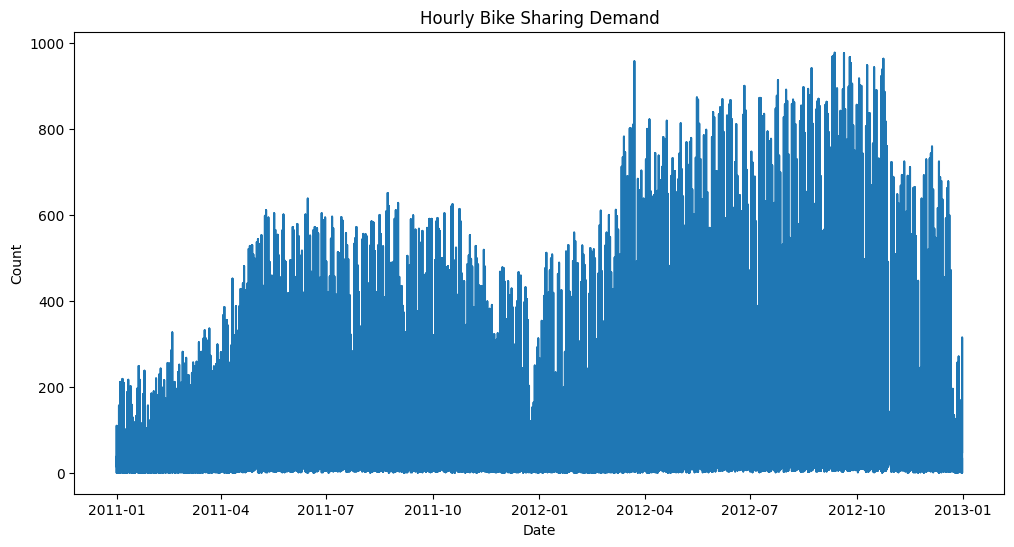

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ValueError: ignored

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 'dteday' 열을 날짜 형식으로 변환
data['dteday'] = pd.to_datetime(data['dteday'])

# 'dteday' 열을 인덱스로 설정
data.set_index('dteday', inplace=True)

# 'cnt' 열만 사용하여 시계열 데이터 생성
ts_data = data['cnt']

# 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Hourly Bike Sharing Demand')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# ARIMA 모델 학습
# ARIMA(p, d, q) 모델 설정: 여기서는 p, d, q를 적절한 값으로 설정해야 합니다.
p = 1  # AR(p)의 차수
d = 1  # 차분(Differencing)의 차수
q = 1  # MA(q)의 차수
model = ARIMA(ts_data, order=(p, d, q))
model_fit = model.fit()

# 모델 예측
n_forecast = 24  # 예측할 시간 단계 수 (예: 다음 24시간 예측)
forecast, stderr, conf_int = model_fit.forecast(steps=n_forecast)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(range(len(ts_data), len(ts_data) + n_forecast), forecast, label='Forecast', color='red')
plt.fill_between(range(len(ts_data), len(ts_data) + n_forecast), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)
plt.title('Hourly Bike Sharing Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# 예측 성능 평가 (예: RMSE)
actual_values = ts_data[-n_forecast:].values
rmse = sqrt(mean_squared_error(actual_values, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

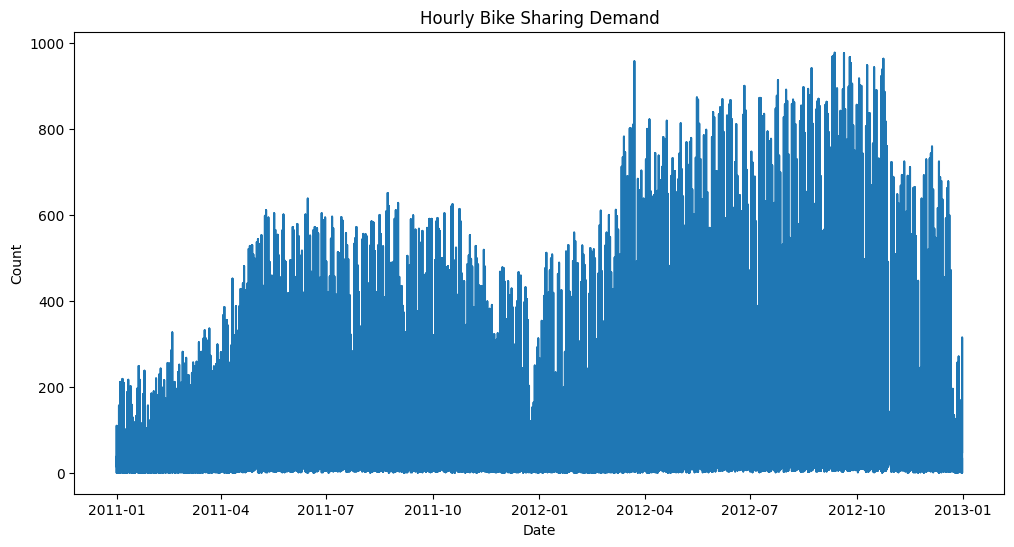

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

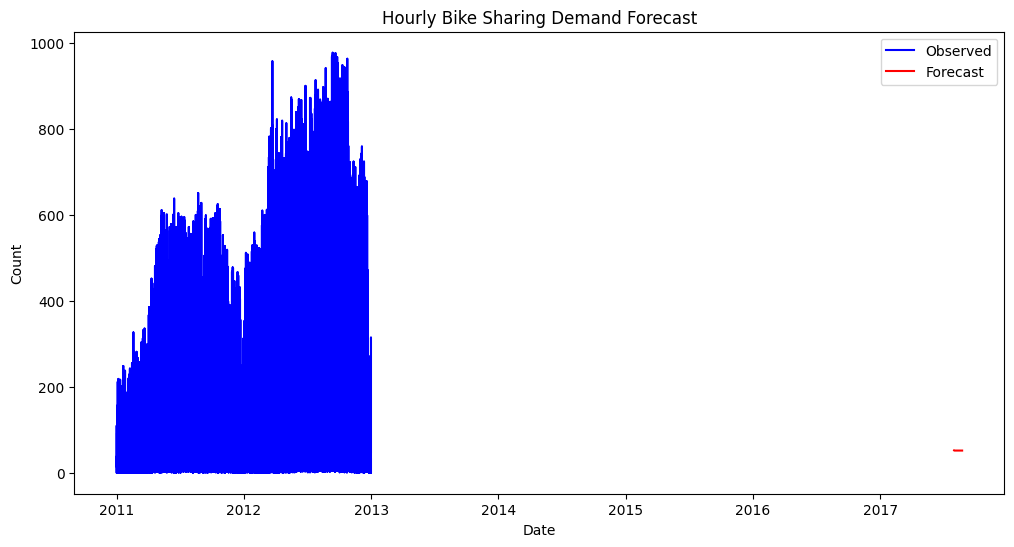

Root Mean Squared Error (RMSE): 105.6274810885686


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# 데이터 불러오기
data_wdc_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv'
data = pd.read_csv(data_wdc_hour)

# 'dteday' 열을 날짜 형식으로 변환
data['dteday'] = pd.to_datetime(data['dteday'])

# 'dteday' 열을 인덱스로 설정
data.set_index('dteday', inplace=True)

# 'cnt' 열만 사용하여 시계열 데이터 생성
ts_data = data['cnt']

# 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Hourly Bike Sharing Demand')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# ARIMA 모델 학습
# ARIMA(p, d, q) 모델 설정: 여기서는 p, d, q를 적절한 값으로 설정해야 합니다.
p = 1  # AR(p)의 차수
d = 1  # 차분(Differencing)의 차수
q = 1  # MA(q)의 차수
model = ARIMA(ts_data, order=(p, d, q))
model_fit = model.fit()

# 모델 예측
n_forecast = 24  # 예측할 시간 단계 수 (예: 다음 24시간 예측)
forecast = model_fit.forecast(steps=n_forecast)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Observed', color='blue')
plt.plot(range(len(ts_data), len(ts_data) + n_forecast), forecast, label='Forecast', color='red')
plt.title('Hourly Bike Sharing Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# 예측 성능 평가 (예: RMSE)
actual_values = ts_data[-n_forecast:].values
rmse = sqrt(mean_squared_error(actual_values, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

#UCI데이터

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기 (UCI 데이터)
data_UCI_hour = 'https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_UCI_hour_data.csv'
data_UCI = pd.read_csv(data_UCI_hour)

# 'datetime' 변수를 문자열로 변환
data_UCI['datetime'] = data_UCI['datetime'].astype(str)

# 'datetime' 변수를 ':'를 기준으로 분할
data_UCI[['dteday', 'hour']] = data_UCI['datetime'].str.split(' ', expand=True)

# 'hour' 변수에서 ':' 제거 및 뒤의 '00' 제거
data_UCI['hour'] = data_UCI['hour'].str.replace(':', '').str[:-2]

# 'dteday' 변수를 '-'를 기준으로 분할
date_split = data_UCI['dteday'].str.split('-')

# 분할된 결과에서 첫 번째 숫자를 'yr' 변수로, 두 번째 숫자를 'mnth' 변수로 설정
data_UCI['yr'] = date_split.str[0].astype(int) - 2011
data_UCI['mnth'] = date_split.str[1].astype(int)

# 'datetime' 변수 제거
data_UCI.drop(columns=['datetime'], inplace=True)

# 로그 변환을 먼저 적용
data_UCI['temp'] = np.log1p(data_UCI['temp'])
data_UCI['atemp'] = np.log1p(data_UCI['atemp'])
data_UCI['hum'] = np.log1p(data_UCI['humidity'])
data_UCI['windspeed'] = np.log1p(data_UCI['windspeed'])

data_UCI.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dteday,hour,yr,mnth,hum
0,1,0,0,1,2.383243,2.734043,81,0.0,3,13,16,2011-01-01,0,0,1,4.406719
1,1,0,0,1,2.304583,2.683416,80,0.0,8,32,40,2011-01-01,1,0,1,4.394449
2,1,0,0,1,2.304583,2.683416,80,0.0,5,27,32,2011-01-01,2,0,1,4.394449
3,1,0,0,1,2.383243,2.734043,75,0.0,3,10,13,2011-01-01,3,0,1,4.330733
4,1,0,0,1,2.383243,2.734043,75,0.0,0,1,1,2011-01-01,4,0,1,4.330733


In [9]:
# UCI 데이터 전처리 (data_UCI와 동일한 방식으로)

# 'day' 변수를 data_wdc_hour에서 복사하여 적용
data_UCI['day'] = data_wdc['day'].copy()

# UCI 데이터를 X_test_UCI로 저장
X_test_UCI = data_UCI.values.astype(np.float32)

data_wdc.head()

# 데이터를 훈련 세트와 테스트 세트로 분할
X_UCI = data_UCI.drop(['count'], axis=1).values.astype(np.float32)
y_UCI = data_UCI['count'].values.astype(np.float32)

X_train_UCI, X_test_UCI, y_train_UCI, y_test_UCI = train_test_split(X_UCI, y_UCI, test_size=0.2, random_state=42)

# Standard Scaling 적용
scaler = StandardScaler()
X_train_UCI_standard = scaler.fit_transform(X_train_UCI)
X_test_UCI_standard = scaler.transform(X_test_UCI)

# Ridge 모델 생성 (표준 스케일링 적용)
alpha_UCI = 0.001  # Ridge 모델의 alpha 값 설정
ridge_regressor_UCI_standard = Ridge(alpha=alpha_UCI)

# 모델 학습 (표준 스케일링 적용)
ridge_regressor_UCI_standard.fit(X_train_UCI_standard, y_train_UCI)

# 테스트 데이터로 예측 (표준 스케일링 적용)
y_pred_UCI_standard = ridge_regressor_UCI_standard.predict(X_test_UCI_standard)

# 모델 평가 (표준 스케일링 적용)
mae_UCI_standard = mean_absolute_error(y_test_UCI, y_pred_UCI_standard)
mse_UCI_standard = mean_squared_error(y_test_UCI, y_pred_UCI_standard)
r_squared_UCI_standard = r2_score(y_test_UCI, y_pred_UCI_standard)

print("MAE (표준 스케일링):", mae_UCI_standard)
print("MSE (표준 스케일링):", mse_UCI_standard)
print("R-squared (표준 스케일링):", r_squared_UCI_standard)


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0.24,0.2879,0.81,0.0,3,13,16,1.0,...,0,0,0,1,1,0,1,0,0,0
1,2,2011-01-01,0.22,0.2727,0.80,0.0,8,32,40,1.0,...,0,0,0,1,1,0,1,0,0,0
2,3,2011-01-01,0.22,0.2727,0.80,0.0,5,27,32,1.0,...,0,0,0,1,1,0,1,0,0,0
3,4,2011-01-01,0.24,0.2879,0.75,0.0,3,10,13,1.0,...,0,0,0,1,1,0,1,0,0,0
4,5,2011-01-01,0.24,0.2879,0.75,0.0,0,1,1,1.0,...,0,0,0,1,1,0,1,0,0,0
